<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Classification Anaemia</b></div>

![](https://img.freepik.com/vetores-gratis/bandeira-de-escudo-de-protecao-de-saude-medica-com-desenho-de-cruz_1017-50356.jpg?t=st=1724528616~exp=1724532216~hmac=702ebf8e1f61a3e93486659116d70d87ed93b385280b894f2f609fe22d787274&w=2000)

# Part 1) Business problem - How accurate is the model in predicting anemia compared to traditional diagnostic methods ?

### 1. **Problem Definition:**
   - **Objective:** Evaluate the accuracy of a machine learning model in predicting anemia using the distribution of image pixels (%Red Pixel, %Green Pixel, %Blue Pixel) and hemoglobin levels (Hb), compared to traditional diagnostic methods such as comprehensive laboratory tests.
   - **Evaluation Metric:** The primary metric to evaluate the model's accuracy will be **Accuracy**, supplemented by metrics like **Precision**, **Recall**, and **Area Under the ROC Curve (AUC)** for a more detailed performance analysis.

### 2. **Data Collection and Preparation:**
   - **Model Data:** Use the columns '%Red Pixel', '%Green Pixel', '%Blue Pixel', 'Hb', and 'Sex' as predictive variables (X) and the 'Anaemic' column as the target variable (Y).
   - **Traditional Data:** Assume that traditional methods involve measuring complete hemoglobin levels and other laboratory tests (which in this case can be represented by the 'Hb' variable as a proxy).

### 3. **Data Splitting:**
   - Split the dataset into training and testing sets (e.g., 70% for training and 30% for testing) to ensure the validity of predictions.
   - Perform stratification based on the target variable 'Anaemic' to ensure that both classes (anaemic and non-anaemic) are proportionally represented.

### 4. **Model Development:**
   - **Candidate Models:**
     - **Simple Models:** Logistic Regression, K-Nearest Neighbors (KNN).
     - **Advanced Models:** Random Forest, Gradient Boosting, XGBoost.
   - **Training:** Train the models using the training set, tuning hyperparameters using GridSearchCV to maximize accuracy.

### 5. **Model Evaluation:**
   - **Model Accuracy:** Measure the model's accuracy on the test set and compare it to the expected accuracy of traditional diagnostic methods.
   - **Other Metrics:** Calculate Precision, Recall, F1-Score, and AUC-ROC to better understand the model's performance in terms of balancing false positives and false negatives.

### 6. **Comparison with Traditional Methods:**
   - **Benchmark Definition:** Establish a benchmark based on the accuracy of traditional anemia diagnostic methods (e.g., an accuracy of 85-90% for laboratory methods).
   - **Comparative Analysis:** Compare the machine learning model's results with the established benchmark. Analyze where the model performs better or worse and discuss possible reasons for these differences.

### 7. **Interpretation and Application of Results:**
   - **Error Analysis:** Identify cases where the machine learning model fails compared to traditional methods and explore the reasons.
   - **Application Potential:** Assess whether the model can be a complementary or substitute tool for traditional methods, especially in contexts where comprehensive laboratory tests are not feasible.

### 8. **Conclusion and Recommendations:**
   - **Conclusion:** Answer the original question regarding the accuracy of the model compared to traditional methods.
   - **Recommendations:** Suggestions on how the model can be improved or integrated into existing healthcare systems, and possible adjustments for different usage contexts (e.g., rural vs. urban areas).

In [1]:
# installing package
!pip install graphviz
!pip install pydotplus
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=c82ce90fe95b1acdd95abbd82ec61730cb05e271be1188f5a85ac6cfe0d9c7c8
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic-dataset/s.csv
/kaggle/input/spaceship-titanic-dataset/catboost_info/learn_error.tsv
/kaggle/input/spaceship-titanic-dataset/catboost_info/catboost_training.json
/kaggle/input/spaceship-titanic-dataset/catboost_info/time_left.tsv
/kaggle/input/spaceship-titanic-dataset/catboost_info/learn/events.out.tfevents
/kaggle/input/ab-test-data/AB_Test_Results.csv
/kaggle/input/anemia-dataset/anemia.csv
/kaggle/input/test-file/tested.csv
/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/anemia-diagnosis-dataset/CBC data_for_meandeley_csv.csv
/kaggle/input/chronic-kidney-disease/kidney_disease_train.csv
/kaggle/input/chronic-kidney-disease/kidney_disease_test.csv
/kaggle/input/anaemia-prediction/output.csv


In [3]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.14
Author: Library versions

plotly    : 5.22.0
re        : 2.2.1
seaborn   : 0.12.2
watermark : 2.4.3
numpy     : 1.26.4
pandas    : 2.2.2
matplotlib: 3.7.5



# Part 2 - Database





1. **Number**
   - **Type:** Integer
   - **Description:** A unique identifier for each individual case.

2. **Sex**
   - **Type:** Categorical (Male, Female)
   - **Description:** The sex of the individual, with possible values "Male" or "Female."

3. **%Red Pixel**
   - **Type:** Float
   - **Description:** The percentage of red pixels in the image associated with the case, representing color distribution.

4. **%Green Pixel**
   - **Type:** Float
   - **Description:** The percentage of green pixels in the image associated with the case, representing color distribution.

5. **%Blue Pixel**
   - **Type:** Float
   - **Description:** The percentage of blue pixels in the image associated with the case, representing color distribution.

6. **Hb**
   - **Type:** Float
   - **Description:** Hemoglobin level of the individual, measured in grams per deciliter (g/dL).

7. **Anaemic**
   - **Type:** Categorical (Yes, No)
   - **Description:** An indicator of anemia status, with possible values "Yes" (1) for anaemicf what each variable represents.

In [4]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
df = pd.read_csv("/kaggle/input/anaemia-prediction/output.csv")
df

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [5]:
# Viewing the first 5 data
df.head()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No

In [6]:
# Viewing the last 5 data
df.tail()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

In [7]:
# Rows and columns
df.shape

(104, 7)

In [8]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [9]:
# Data type
df.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

# Part 3) Exploratory data analysis

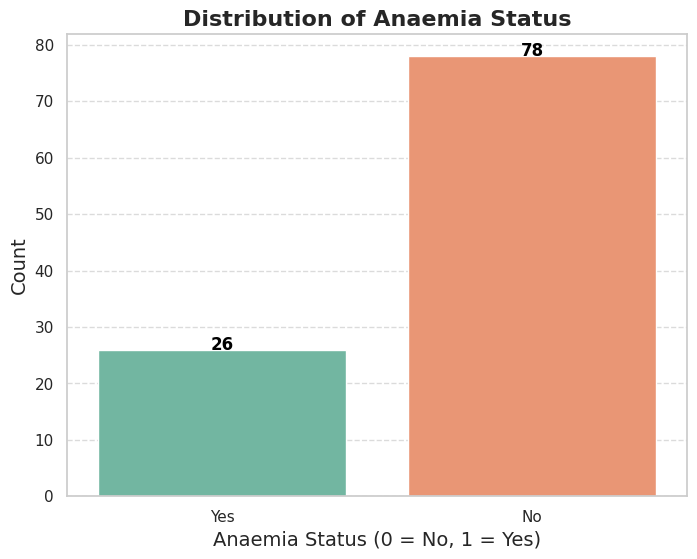

In [10]:
# Create a count plot for the Anaemic variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Anaemic', data=df, palette='Set2')

# Add a title and labels to the axes
plt.title('Distribution of Anaemia Status', fontsize=16, weight='bold')
plt.xlabel('Anaemia Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', weight='bold')

# Add a horizontal grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the vertical grid
ax.grid(False, axis='x')

# Display the plot
plt.show()

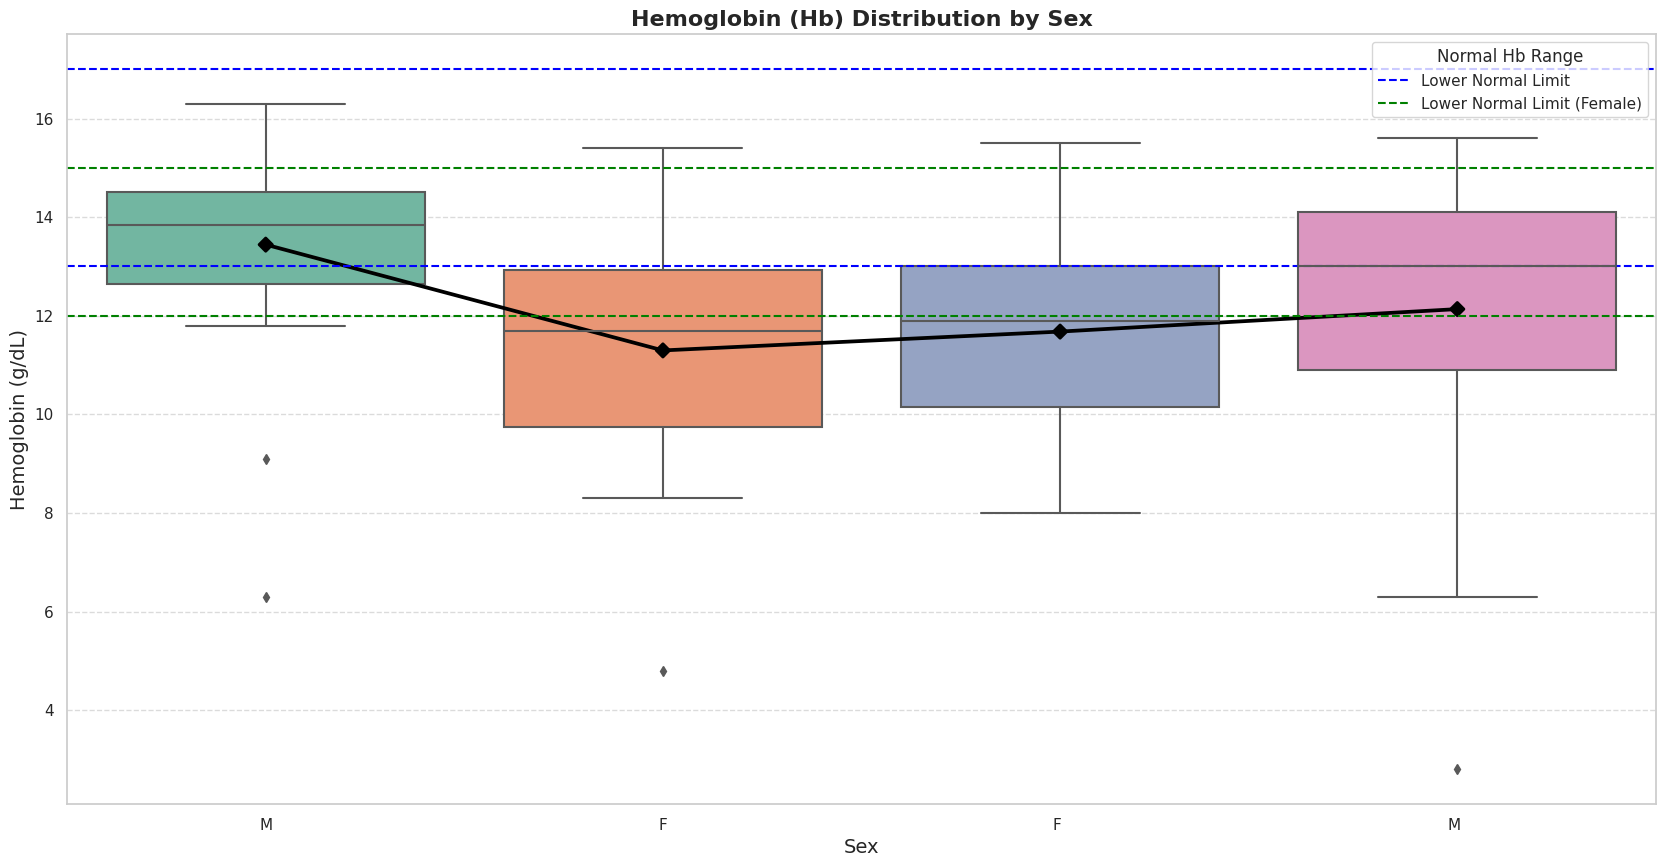

In [11]:
# Improved Boxplot for Hb Distribution by Sex
plt.figure(figsize=(20.5, 10))

# Create the boxplot
sns.boxplot(x='Sex', y='Hb', data=df, palette='Set2')

# Add mean markers
sns.pointplot(x='Sex', y='Hb', data=df, estimator='mean', ci=None, markers='D', color='black')

# Add a title and labels
plt.title('Hemoglobin (Hb) Distribution by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Hemoglobin (g/dL)', fontsize=14)

# Add a horizontal line for normal Hb levels (e.g., 13-17 g/dL for males and 12-15 g/dL for females)
plt.axhline(y=13, color='blue', linestyle='--', label='Lower Normal Limit')
plt.axhline(y=17, color='blue', linestyle='--')
plt.axhline(y=12, color='green', linestyle='--', label='Lower Normal Limit (Female)')
plt.axhline(y=15, color='green', linestyle='--')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the legend
plt.legend(title='Normal Hb Range', loc='upper right')

# Show the plot
plt.show()

In [12]:
# Copy data
data = df.copy()

# Convert column 'Anaemic' from strings to numbers
data['Anaemic'] = data['Anaemic'].map({'Yes': 1,'No': 0})

data.head()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3        1
1       2   F     45.6033       28.1900      26.2067  13.5        0
2       3  F      45.0107       28.9677      26.0215  11.7        0
3       4   F     44.5398       28.9899      26.4703  13.5        0
4       5  M      43.2870       30.6972      26.0158  12.4        0

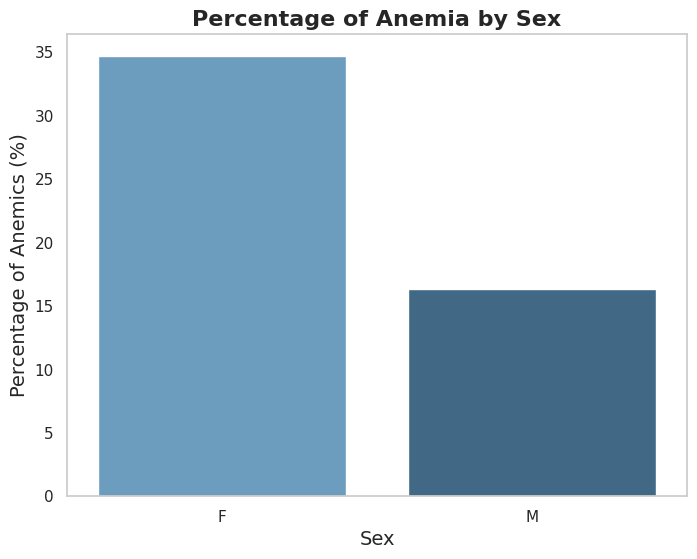

Sex    Anaemic
0   F  34.693878
1   M  16.363636

In [13]:
# Ensure there are no leading/trailing spaces or duplicates
data['Sex'] = data['Sex'].str.strip()  # Remove leading/trailing spaces if any

# Calculate the percentage of anemics by sex
anemia_sex = data.groupby('Sex')['Anaemic'].mean() * 100

# Reset the index to avoid potential issues
anemia_sex = anemia_sex.reset_index()

# Visualization of Anemia Percentage by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Anaemic', data=anemia_sex, palette='Blues_d')

# Add title and labels
plt.title('Percentage of Anemia by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Percentage of Anemics (%)', fontsize=14)

# Remove the vertical grid
plt.grid(False)

# Display the plot
plt.show()
anemia_sex

Distribuição de Cores dos Pixels em Anêmicos vs. Não Anêmicos:
         %Red Pixel  %Green pixel  %Blue pixel
Anaemic                                       
No        46.225991     28.369649    25.404364
Yes       43.938727     30.393081    25.668208


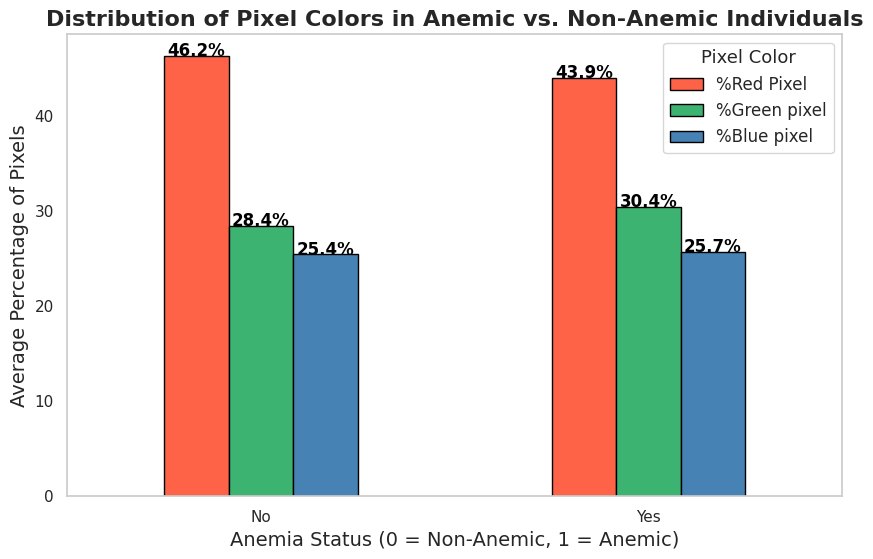

In [14]:
# Analyzing the distribution of pixel colors between anemic and non-anemic individuals
pixel_dist_anemic = df.groupby('Anaemic')[['%Red Pixel', '%Green pixel', '%Blue pixel']].mean()
print("Distribuição de Cores dos Pixels em Anêmicos vs. Não Anêmicos:")
print(pixel_dist_anemic)

# Plotting the distribution of pixel colors
ax = pixel_dist_anemic.plot(kind='bar', figsize=(10, 6), color=['#FF6347', '#3CB371', '#4682B4'], edgecolor='black')

# Improve x-axis label readability
plt.xticks(rotation=0)

# Title and labels
plt.title('Distribution of Pixel Colors in Anemic vs. Non-Anemic Individuals', fontsize=16, weight='bold')
plt.xlabel('Anemia Status (0 = Non-Anemic, 1 = Anemic)', fontsize=14)
plt.ylabel('Average Percentage of Pixels', fontsize=14)

# Adding data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', weight='bold')

# Adjusting legend placement
plt.legend(title='Pixel Color', title_fontsize='13', fontsize='12', loc='upper right')

# Remove the vertical grid
plt.grid(False)

# Show the plot
plt.show()

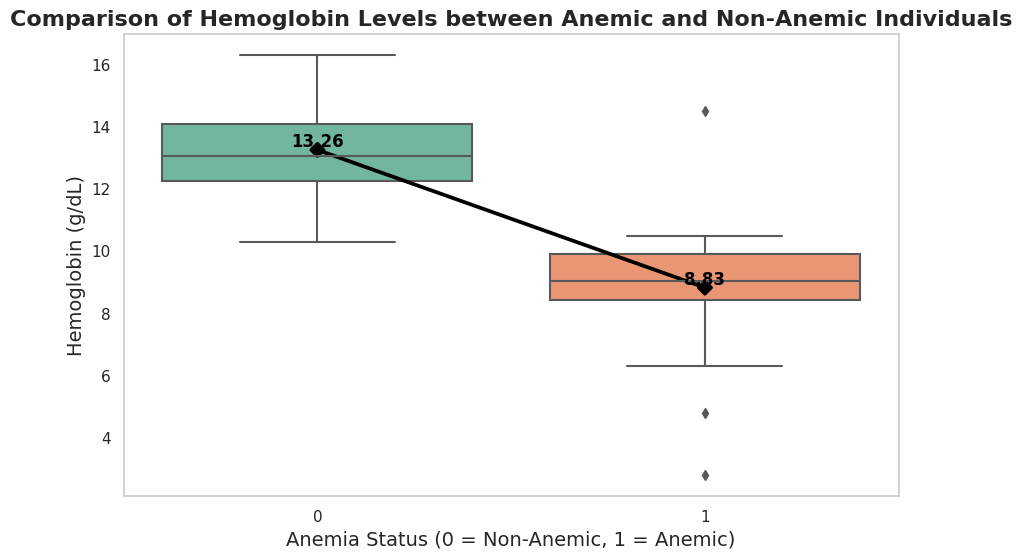

In [15]:
# Improved Boxplot for Hb Comparison between Anemic and Non-Anemic Individuals
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Anaemic', y='Hb', data=data, palette='Set2')

# Add mean markers
sns.pointplot(x='Anaemic', y='Hb', data=data, estimator='mean', ci=None, markers='D', color='black')

# Add title and labels
plt.title('Comparison of Hemoglobin Levels between Anemic and Non-Anemic Individuals', fontsize=16, weight='bold')
plt.xlabel('Anemia Status (0 = Non-Anemic, 1 = Anemic)', fontsize=14)
plt.ylabel('Hemoglobin (g/dL)', fontsize=14)

# Annotate mean Hb values on the plot
hb_means = data.groupby('Anaemic')['Hb'].mean()
for i, mean in enumerate(hb_means):
    plt.text(i, mean + 0.1, f'{mean:.2f}', ha='center', color='black', weight='bold')

# Remove the vertical grid
plt.grid(False)

# Show the plot
plt.show()

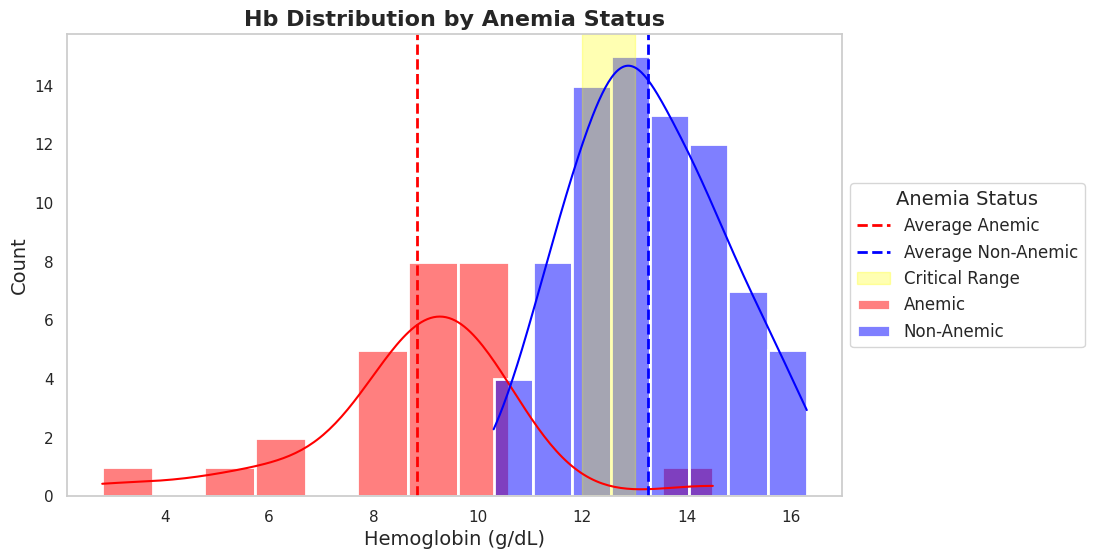

In [16]:
# Histogram for Hb Distribution by Anemia Status with Enhancements
plt.figure(figsize=(10, 6))

# Histogram for Anemic individuals
sns.histplot(data[data['Anaemic'] == 1]['Hb'], kde=True, color='red', label='Anemic', linewidth=2, alpha=0.5)

# Histogram for Non-Anemic individuals
sns.histplot(data[data['Anaemic'] == 0]['Hb'], kde=True, color='blue', label='Non-Anemic', linewidth=2, alpha=0.5)

# Adding vertical lines for mean Hb levels
plt.axvline(data[data['Anaemic'] == 1]['Hb'].mean(), color='red', linestyle='--', linewidth=2, label='Average Anemic')
plt.axvline(data[data['Anaemic'] == 0]['Hb'].mean(), color='blue', linestyle='--', linewidth=2, label='Average Non-Anemic')

# Highlighting critical Hb range (e.g., 12-13 g/dL)
plt.axvspan(12, 13, color='yellow', alpha=0.3, label='Critical Range')

# Title and labels
plt.title('Hb Distribution by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Hemoglobin (g/dL)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Improve the legend, moving it to the right side
plt.legend(title='Anemia Status', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the vertical grid
plt.grid(False)

# Show the plot
plt.show()

# Part 3.1) Test ANOVA

### What is the ANOVA Test?

**ANOVA** (Analysis of Variance) is a statistical technique used to compare the means of three or more independent groups to determine if there is a statistically significant difference between them. The fundamental premise of ANOVA is that the variances within the groups are equal and that the observed differences in group means are due to variance between the groups, rather than by chance.

### Definition:

- **One-Way ANOVA**: Evaluates the differences between the means of several groups in relation to a single independent variable (factor). For example, you might use a one-way ANOVA to test whether the means of different medical treatments produce different outcomes.

- **Two-Way ANOVA**: Evaluates the differences between group means when there are two independent variables. For example, you might use a two-way ANOVA to test whether two different treatments have distinct effects on men and women.

### Key Components of ANOVA:

1. **F-Value**: The primary result of the ANOVA test, which is the ratio of explained variance to unexplained variance. A high F-value indicates that the differences between groups are larger than the differences within groups.

2. **p-Value**: Indicates the statistical significance of the F-value. A p-value less than 0.05 typically suggests that there is a statistically significant difference between the group means.

3. **Hypotheses**:
   - **Null Hypothesis (H₀)**: There is no significant difference between the group means.
   - **Alternative Hypothesis (H₁)**: At least one of the group means is different from the others.

### When to Use the ANOVA Test?

- When you want to compare the means of three or more groups.
- When the data follows a normal distribution.
- When the variances between groups are homogeneous.

### Example of Application:

Suppose you are studying hemoglobin levels across different age groups to determine if there are significant differences between them. You could use ANOVA to check whether the mean hemoglobin levels differ significantly across age groups.

ANOVA is widely used in scientific research, clinical experiments, and various fields of study to compare groups and determine if the observed effects are statistically significant.

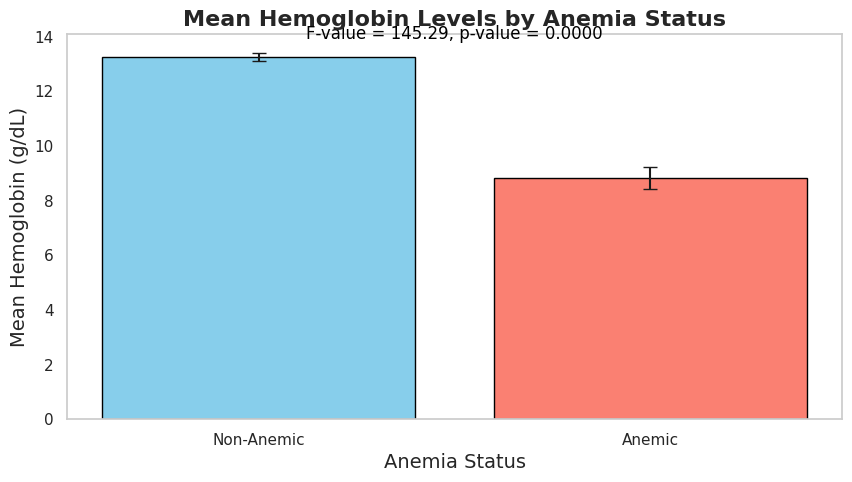

ANOVA between Anemic and Non-Anemic Groups: F-value = 145.29179778164217, p-value = 2.4779272293887e-21


In [17]:
from scipy import stats

# Perform ANOVA
anova_result = stats.f_oneway(data[data['Anaemic'] == 1]['Hb'], data[data['Anaemic'] == 0]['Hb'])

# Calculate means and standard errors
means = data.groupby('Anaemic')['Hb'].mean()
errors = data.groupby('Anaemic')['Hb'].sem()

# Create a bar plot with error bars
plt.figure(figsize=(10, 5))
plt.bar(x=['Non-Anemic', 'Anemic'], height=means, yerr=errors, capsize=5, color=['skyblue', 'salmon'], edgecolor='black')

# Add title and labels
plt.title('Mean Hemoglobin Levels by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Anemia Status', fontsize=14)
plt.ylabel('Mean Hemoglobin (g/dL)', fontsize=14)

# Annotate ANOVA results
plt.text(0.5, max(means) + 0.5, f'F-value = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Remove the vertical grid
plt.grid(False)

# Show the plot
plt.show()

# Viewing test
print(f"ANOVA between Anemic and Non-Anemic Groups: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

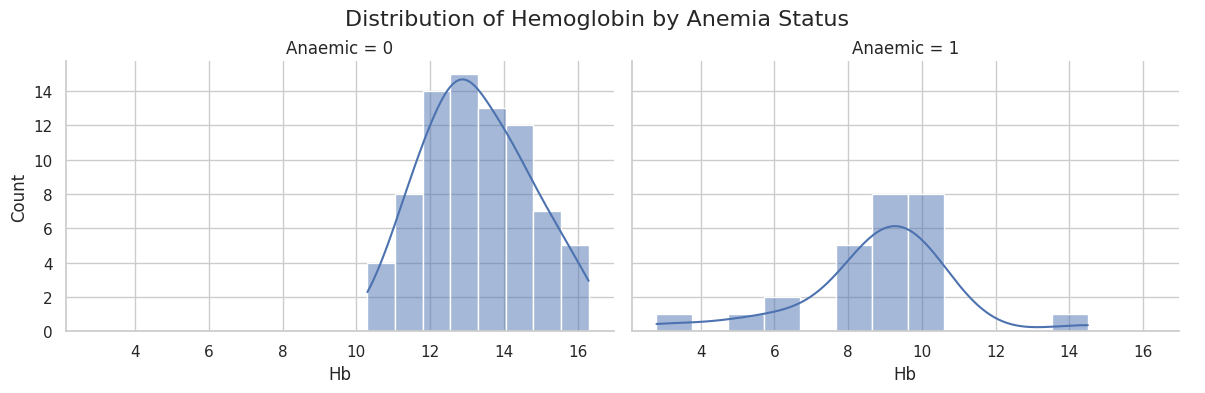

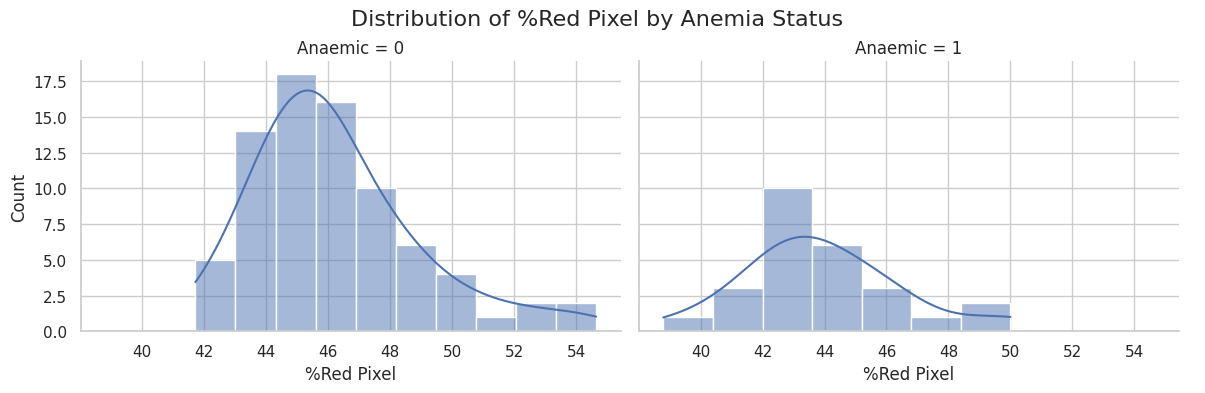

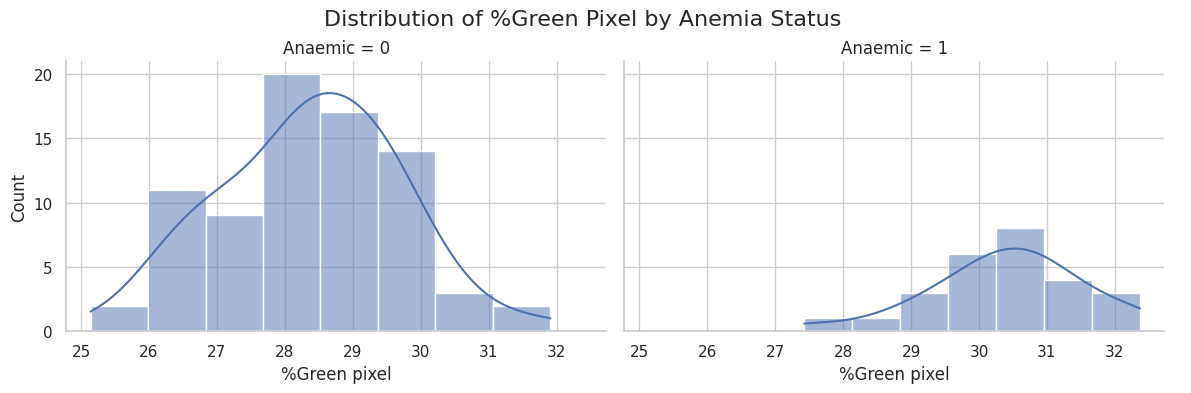

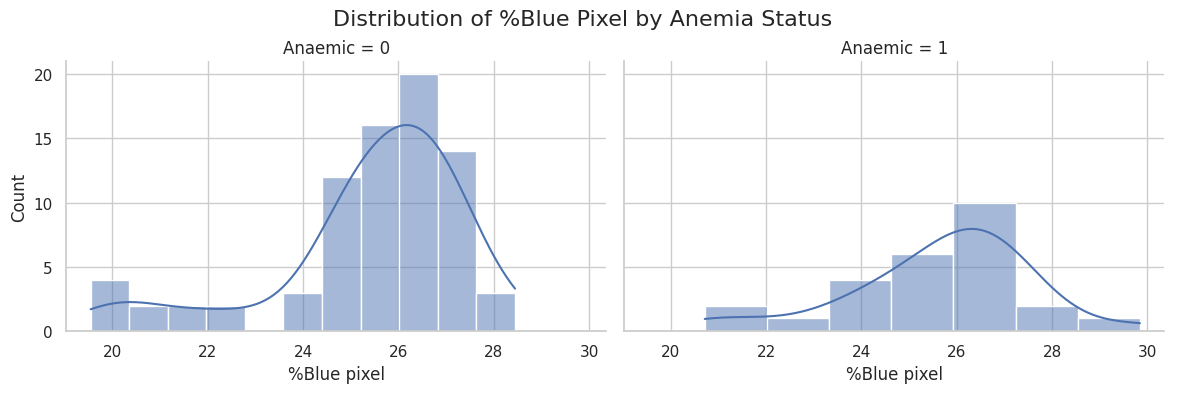

In [18]:
# Separate FacetGrids for each variable
# For Hemoglobin
g1 = sns.FacetGrid(data, col="Anaemic", height=4, aspect=1.5)
g1.map(sns.histplot, "Hb", kde=True)
g1.add_legend()
g1.fig.suptitle('Distribution of Hemoglobin by Anemia Status', fontsize=16)
plt.subplots_adjust(top=0.85)

# For %Red Pixel
g2 = sns.FacetGrid(data, col="Anaemic", height=4, aspect=1.5)
g2.map(sns.histplot, '%Red Pixel', kde=True)
g2.add_legend()
g2.fig.suptitle('Distribution of %Red Pixel by Anemia Status', fontsize=16)
plt.subplots_adjust(top=0.85)

# For %Green Pixel
g3 = sns.FacetGrid(data, col="Anaemic", height=4, aspect=1.5)
g3.map(sns.histplot, '%Green pixel', kde=True)
g3.add_legend()
g3.fig.suptitle('Distribution of %Green Pixel by Anemia Status', fontsize=16)
plt.subplots_adjust(top=0.85)

# For %Blue Pixel
g4 = sns.FacetGrid(data, col="Anaemic", height=4, aspect=1.5)
g4.map(sns.histplot, '%Blue pixel', kde=True)
g4.add_legend()
g4.fig.suptitle('Distribution of %Blue Pixel by Anemia Status', fontsize=16)
plt.subplots_adjust(top=0.85)

# Show all plots
plt.show()

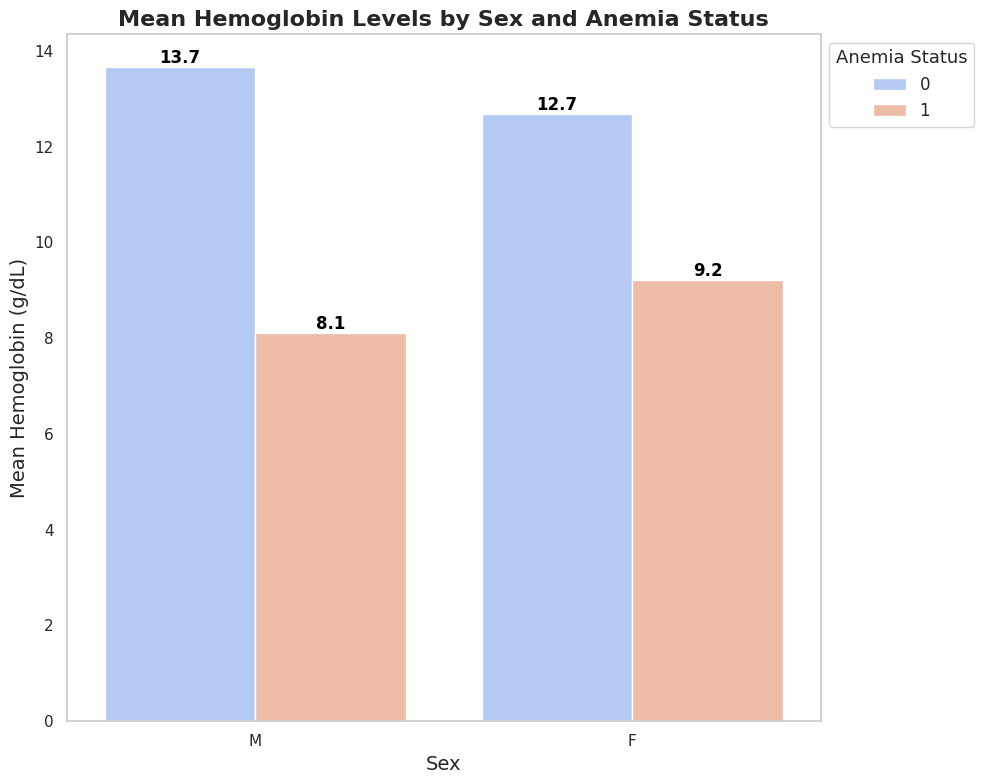

In [19]:
# Create the bar plot with enhanced features
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Sex", y="Hb", hue="Anaemic", data=data, ci=None, palette="coolwarm")

# Add title and labels
plt.title('Mean Hemoglobin Levels by Sex and Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Mean Hemoglobin (g/dL)', fontsize=14)

# Add the mean values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Move the legend outside the plot
plt.legend(title='Anemia Status', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

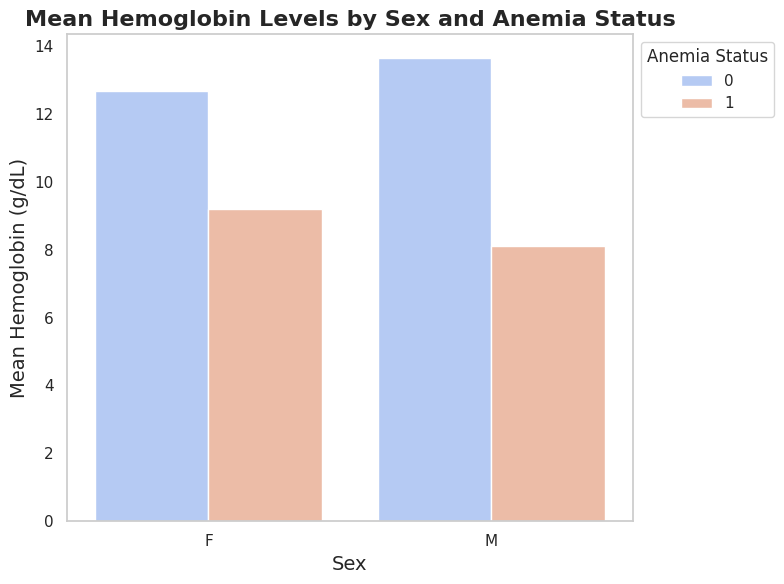

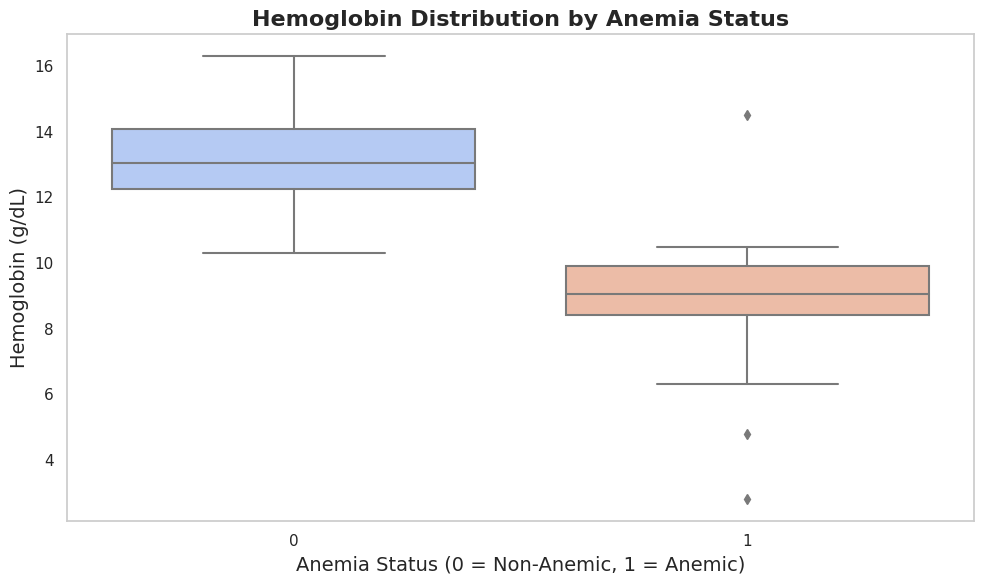

In [20]:
# Example of aggregation by Sex (for simplification)
aggregated_data = data.groupby(['Sex', 'Anaemic'])['Hb'].mean().reset_index()

# Bar plot of aggregated data
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Hb", hue="Anaemic", data=aggregated_data, palette="coolwarm")

# Add title and labels
plt.title('Mean Hemoglobin Levels by Sex and Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Mean Hemoglobin (g/dL)', fontsize=14)

# Move the legend
plt.legend(title='Anemia Status', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Alternatively, use a boxplot for all data
plt.figure(figsize=(10, 6))
sns.boxplot(x="Anaemic", y="Hb", data=data, palette="coolwarm")
plt.title('Hemoglobin Distribution by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Anemia Status (0 = Non-Anemic, 1 = Anemic)', fontsize=14)
plt.ylabel('Hemoglobin (g/dL)', fontsize=14)

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

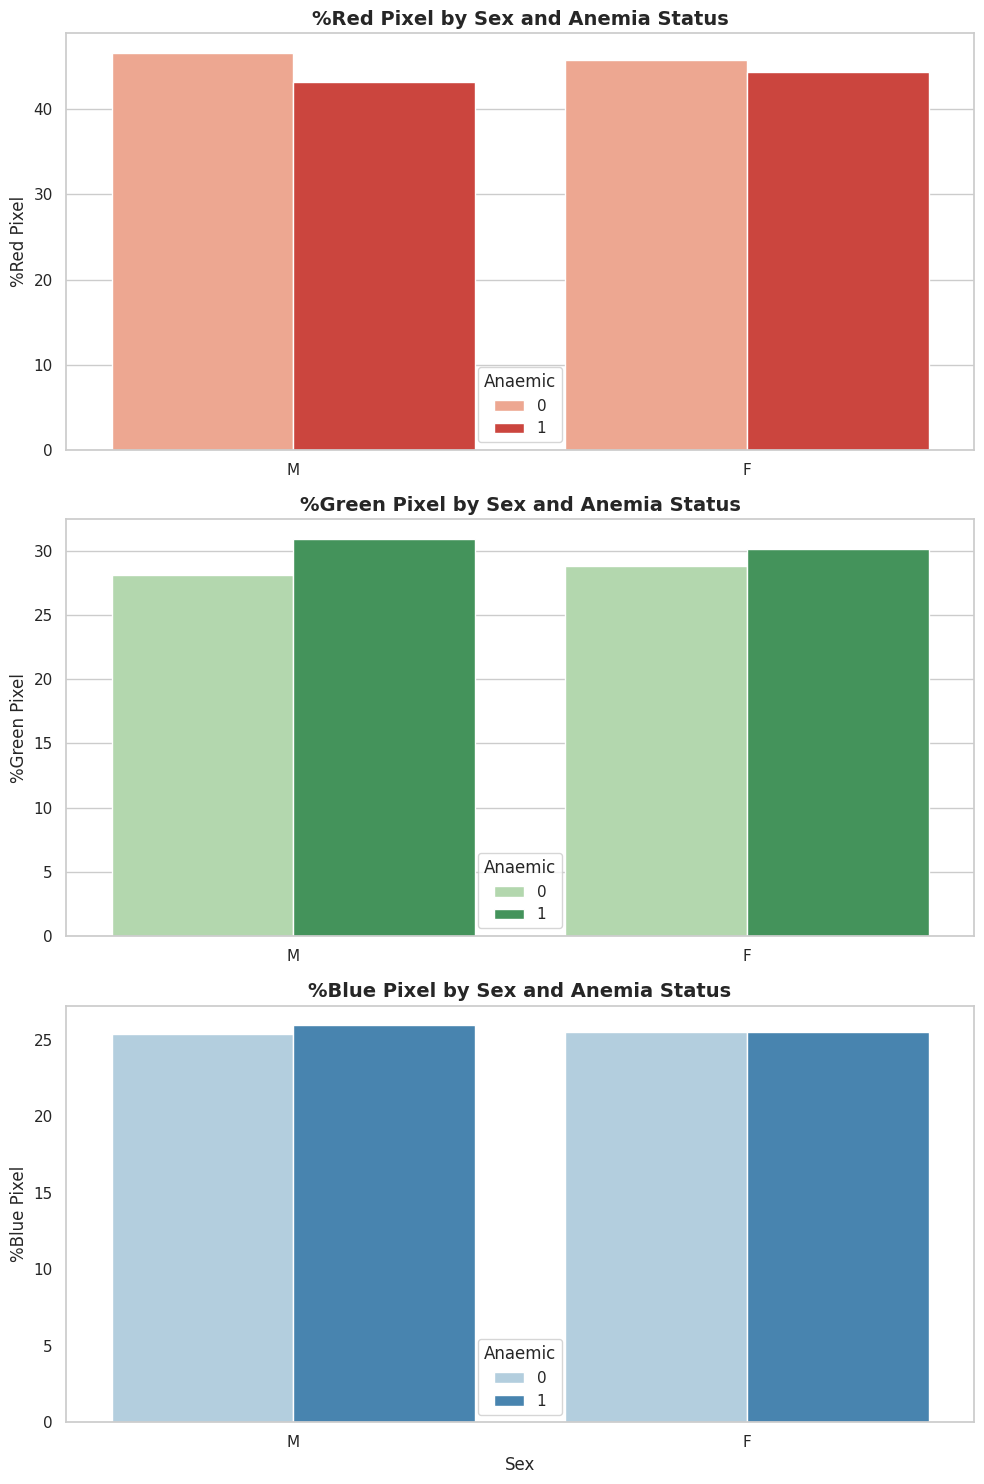

In [21]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for %Red Pixel
sns.barplot(x="Sex", y="%Red Pixel", hue="Anaemic", data=data, palette="Reds", ci=None, ax=axes[0])
axes[0].set_title('%Red Pixel by Sex and Anemia Status', fontsize=14, weight='bold')
axes[0].set_xlabel('')  # Remove x-axis label to avoid repetition
axes[0].set_ylabel('%Red Pixel')

# Plot for %Green Pixel
sns.barplot(x="Sex", y="%Green pixel", hue="Anaemic", data=data, palette="Greens", ci=None, ax=axes[1])
axes[1].set_title('%Green Pixel by Sex and Anemia Status', fontsize=14, weight='bold')
axes[1].set_xlabel('')  # Remove x-axis label to avoid repetition
axes[1].set_ylabel('%Green Pixel')

# Plot for %Blue Pixel
sns.barplot(x="Sex", y="%Blue pixel", hue="Anaemic", data=data, palette="Blues", ci=None, ax=axes[2])
axes[2].set_title('%Blue Pixel by Sex and Anemia Status', fontsize=14, weight='bold')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('%Blue Pixel')

# Adjust layout to make space for titles and labels

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

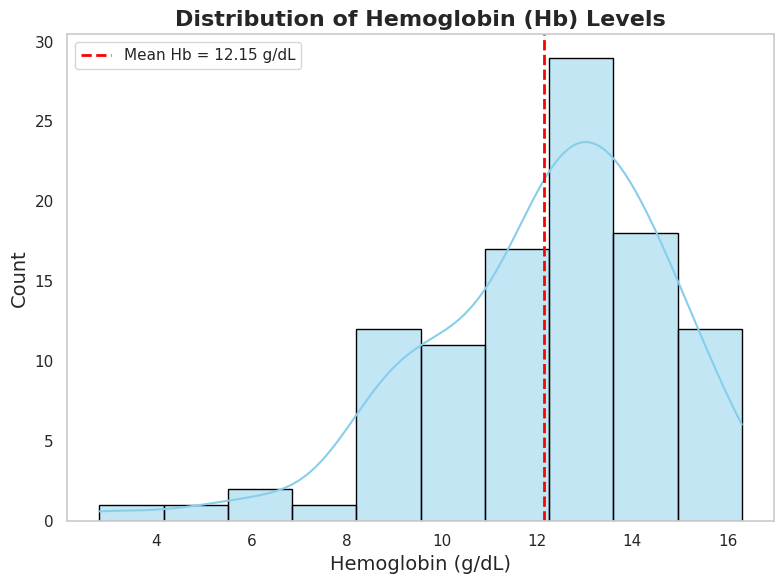

In [22]:
# Create a histogram for Hb with KDE overlay
plt.figure(figsize=(8, 6))
sns.histplot(data["Hb"], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Hemoglobin (Hb) Levels', fontsize=16, weight='bold')
plt.xlabel('Hemoglobin (g/dL)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate mean Hb level
mean_hb = data["Hb"].mean()
plt.axvline(mean_hb, color='red', linestyle='--', linewidth=2, label=f'Mean Hb = {mean_hb:.2f} g/dL')
plt.legend()

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

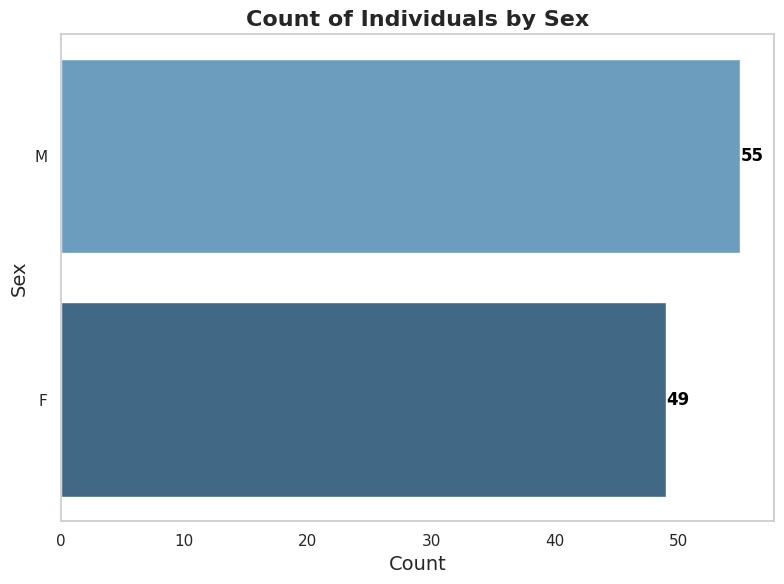

In [23]:
# Create a count plot for Sex with horizontal bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(y=data["Sex"], palette="Blues_d")

# Add title and labels
plt.title('Count of Individuals by Sex', fontsize=16, weight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sex', fontsize=14)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=12, color='black', weight='bold')

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

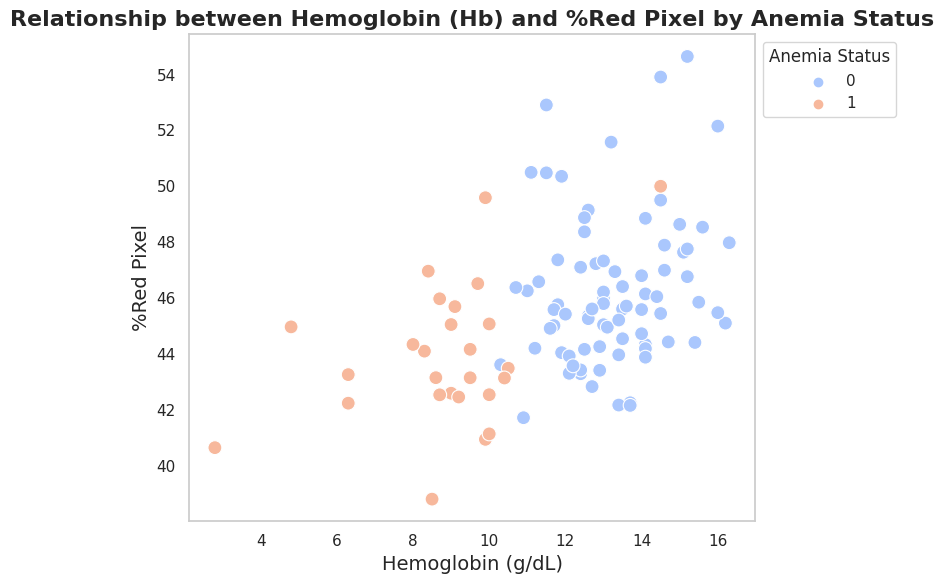

In [24]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Hb", y="%Red Pixel", hue="Anaemic", data=data, palette="coolwarm", s=100)

# Add title and labels
plt.title('Relationship between Hemoglobin (Hb) and %Red Pixel by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Hemoglobin (g/dL)', fontsize=14)
plt.ylabel('%Red Pixel', fontsize=14)

# Move the legend
plt.legend(title='Anemia Status', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

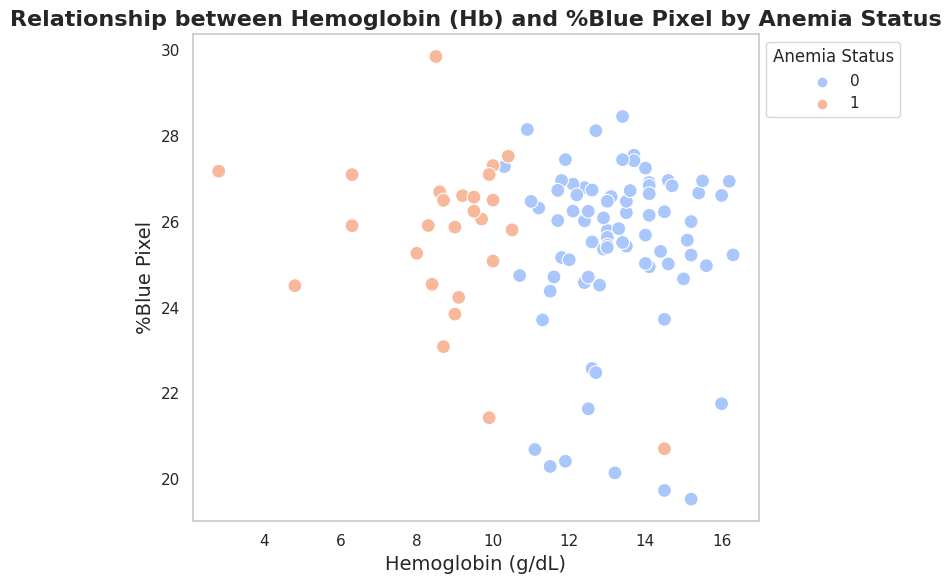

In [25]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Hb", y="%Blue pixel", hue="Anaemic", data=data, palette="coolwarm", s=100)

# Add title and labels
plt.title('Relationship between Hemoglobin (Hb) and %Blue Pixel by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Hemoglobin (g/dL)', fontsize=14)
plt.ylabel('%Blue Pixel', fontsize=14)

# Move the legend
plt.legend(title='Anemia Status', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

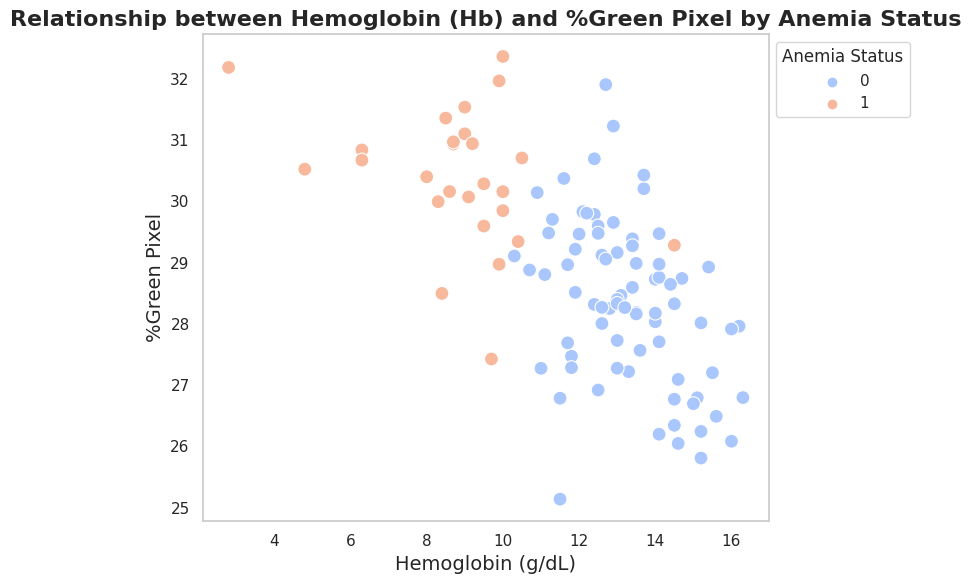

In [26]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Hb", y="%Green pixel", hue="Anaemic", data=data, palette="coolwarm", s=100)

# Add title and labels
plt.title('Relationship between Hemoglobin (Hb) and %Green Pixel by Anemia Status', fontsize=16, weight='bold')
plt.xlabel('Hemoglobin (g/dL)', fontsize=14)
plt.ylabel('%Green Pixel', fontsize=14)

# Move the legend
plt.legend(title='Anemia Status', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the vertical grid
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

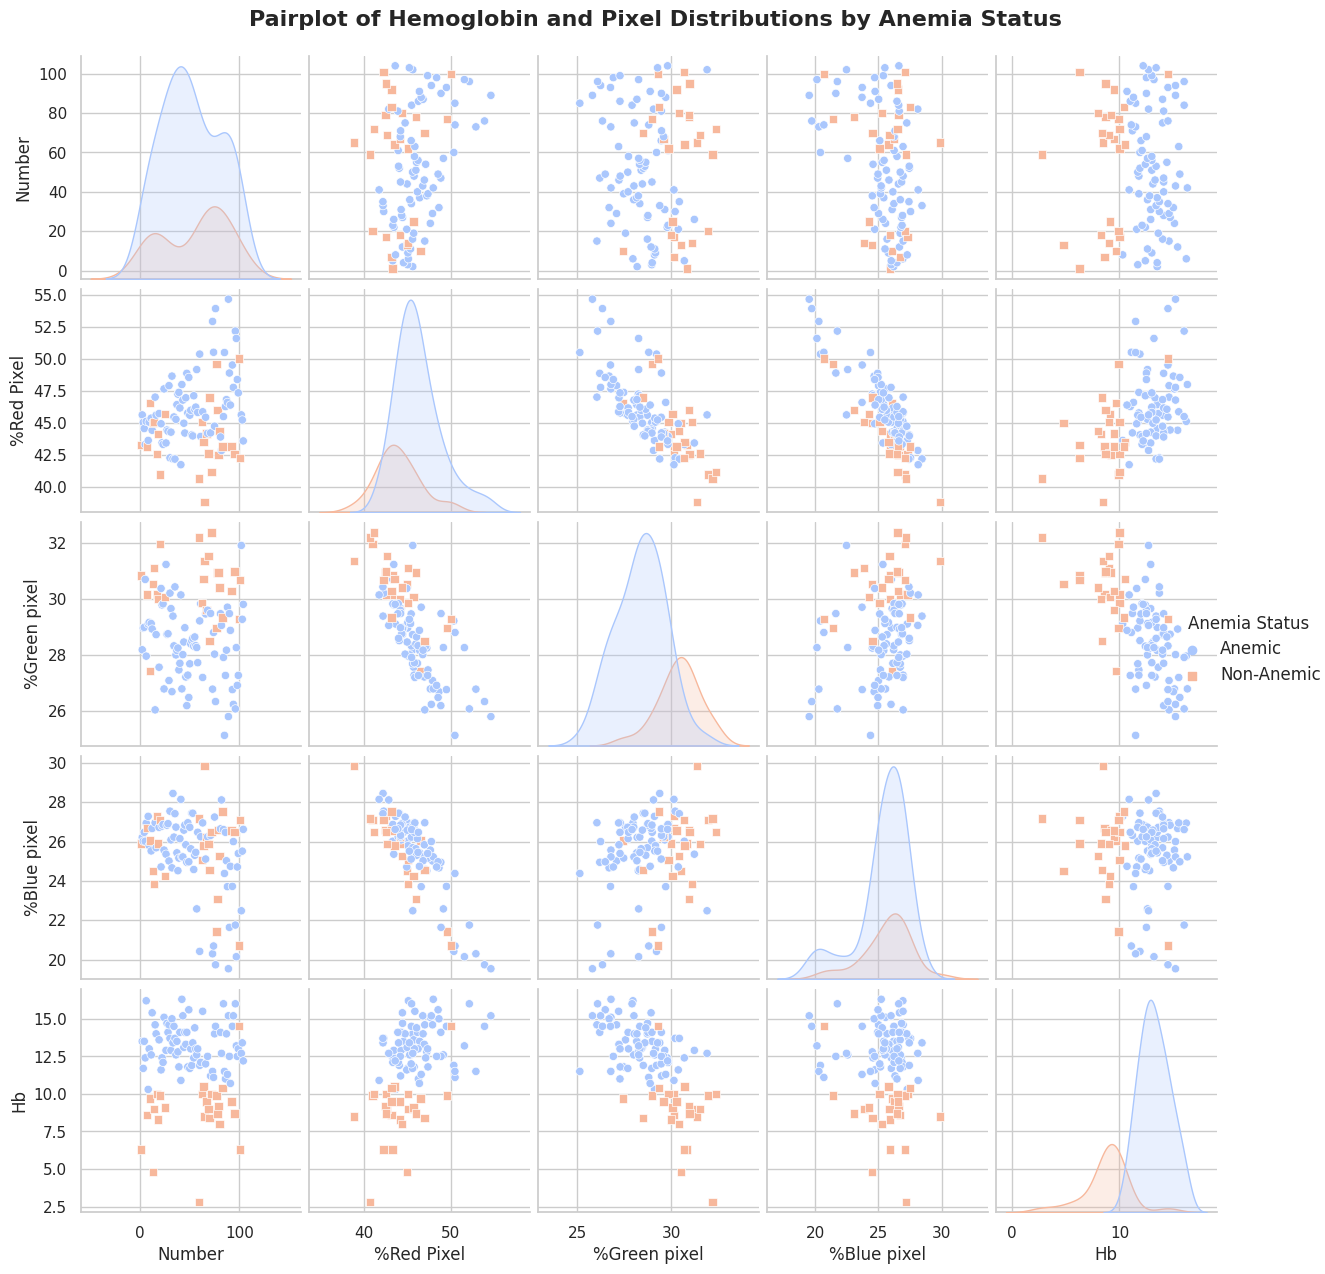

In [27]:
# Create the pairplot
pairplot = sns.pairplot(data, hue="Anaemic", palette="coolwarm", markers=["o", "s"], height=2.5)

# Customize the legend
pairplot._legend.set_title('Anemia Status')
new_labels = ['Anemic', 'Non-Anemic']
for t, l in zip(pairplot._legend.texts, new_labels):
    t.set_text(l)

# Adjust legend font size and position
pairplot._legend.set_bbox_to_anchor((1, 0.5))
pairplot._legend.get_frame().set_edgecolor('black')
pairplot._legend.get_frame().set_linewidth(1.5)
pairplot._legend.get_frame().set_alpha(1)  # Make the legend background fully opaque

# Adjust the font size in the legend
for text in pairplot._legend.texts:
    text.set_fontsize(12)

# Add a title to the plot
plt.suptitle('Pairplot of Hemoglobin and Pixel Distributions by Anemia Status', fontsize=16, weight='bold', y=1.02)

# Display the plot
plt.show()

# Part 4 - Data Cleaning

In [28]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64


In [29]:
# Checking for NaN data
nan_data_by_column = df.isna().sum()
nan_total_data = df.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

Total NaN data in DataFrame: 0


In [30]:
# Checking for missing data
missing_data = df.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


Number    Sex  %Red Pixel  %Green pixel  %Blue pixel     Hb  Anaemic
0     False  False       False         False        False  False    False
1     False  False       False         False        False  False    False
2     False  False       False         False        False  False    False
3     False  False       False         False        False  False    False
4     False  False       False         False        False  False    False
..      ...    ...         ...           ...          ...    ...      ...
99    False  False       False         False        False  False    False
100   False  False       False         False        False  False    False
101   False  False       False         False        False  False    False
102   False  False       False         False        False  False    False
103   False  False       False         False        False  False    False

[104 rows x 7 columns]

# Part 5 - Preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler_standard = StandardScaler()

# Applying StandardScaler to variables, correcting the error with reshape
df['%Red Pixel'] = scaler_standard.fit_transform(df['%Red Pixel'].values.reshape(-1, 1))
df['%Green pixel'] = scaler_standard.fit_transform(df['%Green pixel'].values.reshape(-1, 1))
df['%Blue pixel'] = scaler_standard.fit_transform(df['%Blue pixel'].values.reshape(-1, 1))
df['Hb'] = scaler_standard.fit_transform(df['Hb'].values.reshape(-1, 1))

# Viewing
scaler_standard

StandardScaler()

### **Why Use `StandardScaler`:**

1. **Standardization Process:**
   - `StandardScaler` standardizes the features by subtracting the mean and dividing by the standard deviation of the feature. This transformation centers the data around zero with a unit variance (i.e., mean of 0 and standard deviation of 1).
   - Mathematically, for a feature `x`:
     $$z = \frac{x - \text{mean}(x)}{\text{std}(x)}$$
   - This results in a transformed feature `z` with a mean of 0 and a standard deviation of 1.

2. **Importance in Machine Learning:**
   - **Algorithm Sensitivity:** Many machine learning algorithms (e.g., gradient descent-based methods, k-nearest neighbors, and support vector machines) are sensitive to the scale of the input features. Features with larger scales can dominate the learning process, leading to biased model performance.
   - **Faster Convergence:** For algorithms like gradient descent, scaling can lead to faster convergence because the optimization process does not have to navigate elongated contours.
   - **Improved Performance:** By standardizing the features, the model treats all features equally, leading to better generalization and more accurate predictions.

3. **Feature Comparability:**
   - Standardization makes it easier to compare the importance of different features because they are on the same scale. Without standardization, a feature with a higher scale might appear more important to the model than it actually is.

### **Explanation of Code Specifics:**

- **Reshape:** The `.values.reshape(-1, 1)` is used because `StandardScaler` expects a 2D array as input. The `reshape(-1, 1)` ensures that the input feature, which is a 1D array, is converted into a 2D array with one column and multiple rows (each row corresponding to one sample).
- **Application to Features:**
  - `df['%Red Pixel']`, `df['%Green pixel']`, `df['%Blue pixel']`, and `df['Hb']` are all standardized to have a mean of 0 and a standard deviation of 1. This is crucial since these features might have different scales originally (e.g., Hb might range from 4 to 16, while pixel percentages might range from 20% to 55%).

### **When to Use `StandardScaler`:**

- **Before Applying Algorithms:** Always apply `StandardScaler` before fitting your machine learning models, especially when the algorithm is sensitive to feature scales (e.g., linear regression, logistic regression, SVMs, and neural networks).
- **Pipelines:** Integrate `StandardScaler` into a pipeline to ensure that the same transformation is applied to both training and test data, preventing data leakage and ensuring consistent preprocessing.

By standardizing your features, you ensure that your machine learning model performs optimally, treating all features equally, which leads to better, more reliable predictions.


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applying MinMaxScaler to variables, correcting the error with reshape
df['%Red Pixel'] = scaler_minmax.fit_transform(df['%Red Pixel'].values.reshape(-1, 1))
df['%Green pixel'] = scaler_minmax.fit_transform(df['%Green pixel'].values.reshape(-1, 1))
df['%Blue pixel'] = scaler_minmax.fit_transform(df['%Blue pixel'].values.reshape(-1, 1))
df['Hb'] = scaler_minmax.fit_transform(df['Hb'].values.reshape(-1, 1))

# Viewing
scaler_minmax

MinMaxScaler()



The use of `MinMaxScaler` in your code is essential for scaling the features (variables) to a specific range before applying machine learning algorithms. Here’s a detailed explanation:

### **Why Use `MinMaxScaler`:**

1. **Scaling Process:**
   - `MinMaxScaler` transforms features by scaling each feature to a given range, typically [0, 1]. This transformation adjusts the data so that it fits within the specified range, preserving the relationships between the data points.
   - Mathematically, for a feature `x`:
     $$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$
   - This results in a transformed feature `x'` where all values are within the range [0, 1].

2. **Importance in Machine Learning:**
   - **Algorithm Sensitivity:** Many machine learning algorithms (e.g., neural networks, k-nearest neighbors) are sensitive to the scale of the input features. Using `MinMaxScaler` ensures that features with different units and scales do not unduly influence the model.
   - **Handling Features with Different Ranges:** When features have different ranges, some algorithms might prioritize features with larger ranges. `MinMaxScaler` ensures that all features contribute equally to the model's learning process.

3. **Feature Comparability:**
   - Scaling features to the same range, especially [0, 1], makes it easier to compare and weigh the importance of different features in your machine learning models.

### **Explanation of Code Specifics:**

- **Reshape:** The `.values.reshape(-1, 1)` is used because `MinMaxScaler` expects a 2D array as input. The `reshape(-1, 1)` ensures that the input feature, which is a 1D array, is converted into a 2D array with one column and multiple rows (each row corresponding to one sample).
- **Application to Features:**
  - `df['%Red Pixel']`, `df['%Green pixel']`, `df['%Blue pixel']`, and `df['Hb']` are all scaled to the range [0, 1]. This is particularly useful since these features might have different original ranges (e.g., Hb might range from 4 to 16, while pixel percentages might range from 20% to 55%).

### **When to Use `MinMaxScaler`:**

- **Before Applying Algorithms:** Use `MinMaxScaler` when your machine learning algorithm is sensitive to the magnitude of features, such as when using neural networks, k-nearest neighbors, or clustering algorithms.
- **Normalization Requirements:** If your model or analysis requires normalized data, `MinMaxScaler` is a suitable choice to bring all features within a uniform range.

By applying `MinMaxScaler`, you ensure that your features are scaled consistently, enabling your machine learning model to perform more effectively. This approach is particularly beneficial when working with algorithms that are sensitive to the scale of the input data, ensuring that each feature contributes ng it consistent and easy to follow.

In [33]:
# Visualizing dataset after preprocessing
df.head()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel        Hb Anaemic
0       1   M    0.281288      0.788871     0.617586  0.259259     Yes
1       2   F    0.429405      0.421940     0.647120  0.792593      No
2       3  F     0.392019      0.529539     0.629140  0.659259      No
3       4   F    0.362312      0.532610     0.672712  0.792593      No
4       5  M     0.283276      0.768823     0.628586  0.711111      No

# Part 6 - Feature engineering

**Definition - Feature engineering**

Feature engineering is the process of using domain knowledge of the data to create features (input variables) that make machine learning algorithms work more effectively. It's a crucial step in the data preprocessing pipeline and involves transforming raw data into features that better represent the underlying problem to predictive models, resulting in improved model accuracy and performance.

**Importance of Feature Engineering**

1. **Improved Model Performance:** Better features often lead to better models. The choice of features can greatly influence the model's ability to learn and generalize to new data.

2. **Increased Model Interpretability:** Well-engineered features can make models easier to interpret by making the relationships between inputs and outputs more explicit.

3. **Handling Diverse Data Types:** Feature engineering allows machine learning models to handle a variety of data types, such as categorical data, time series data, and text data, more effectively.

**Example**

Suppose you're working on a problem to predict house prices. Feature engineering might involve:

- Creating a new feature like "house age" by subtracting the year built from the current year.
- Scaling the square footage of houses to the range [0, 1].
- One-hot encoding the type of house (e.g., detached, semi-detached, terraced).
- These engineered features can then be fed into a machine learning model to predict house prices more accurately than using the raw features alone.

In [34]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis ​​categóricas
label_encoder = LabelEncoder()

# Aplicando nas colunas mudando em números
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])

# Viewing
label_encoder

LabelEncoder()

1. **Importing the Library:**
   - The `LabelEncoder` is imported from `sklearn.preprocessing`. This encoder is used to convert categorical values into numeric labels, which are required by most machine learning algorithms.

2. **Initializing the Encoder:**
   - An instance of `LabelEncoder` is created and stored in the variable `label_encoder`.

3. **Encoding Categorical Variables:**
   - **Sex**: The categorical variable `Sex`, which might have values like "Male" and "Female", is encoded into numeric labels (e.g., 0 and 1).
   - **Anaemic**: The categorical variable `Anaemic`, which might have values like "Yes" and "No", is also encoded into numeric labels (e.g., 0 for "No" and 1 for "Yes").

   This is done using the `fit_transform` method, which both fits the encoder to the data and then transforms it in one step.

4. **Viewing the Encoder:**
   - The `label_encoder` object is displayed, although this line (`label_encoder`) won't produce a meaningful output by itself. It just shows that the `label_encoder` object has been created and used.

### **Explanation of the Process:**

- **Label Encoding:**
  - The `LabelEncoder` assigns a unique numeric value (integer) to each category in a categorical feature. For instance:
    - If `Sex` has categories "Male" and "Female", `LabelEncoder` might assign "Male" = 1 and "Female" = 0 (or vice versa).
    - Similarly, for `Anaemic`, "Yes" might be encoded as 1 and "No" as 0.

- **Why Use Label Encoding:**
  - Machine learning algorithms generally require numeric input, so categorical variables must be converted to numbers. `LabelEncoder` is a simple and effective way to achieve this when the categorical variable is ordinal or does not have an inherent ordering.

### **Things to Consider:**

- **Ordinal Encoding vs. One-Hot Encoding:**
  - **Label Encoding** is appropriate when the categorical variable has an inherent order, or when the model you're using can handle integer-encoded categorical variables well.
  - **One-Hot Encoding** may be more appropriate if there is no inherent order in the categorical variables (e.g., "Red", "Green", "Blue") and you want to avoid imposing any order.

- **Impact on Models:**
  - Some models may interpret numeric labels as ordered even if they aren't (e.g., treating "Male" > "Female"), which might not be desirable. Ensure that the algorithm used can handle the encoded labels correctly.

### **Conclusion:**

This code effectively converts categorical variables into a numeric format that can be used in machine learning models. The `LabelEncoder` is a straightforward tool for this task, particularly useful when dealing with ordinal or binary categorical features.

In [35]:
# Viewing 
df.head()

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel        Hb  Anaemic
0       1    2    0.281288      0.788871     0.617586  0.259259        1
1       2    0    0.429405      0.421940     0.647120  0.792593        0
2       3    1    0.392019      0.529539     0.629140  0.659259        0
3       4    0    0.362312      0.532610     0.672712  0.792593        0
4       5    3    0.283276      0.768823     0.628586  0.711111        0

In [36]:
# Converter a coluna 'Anaemic' para tipo inteiro
df['Anaemic'] = df['Anaemic'].astype('int64')
df.dtypes

Number            int64
Sex               int64
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic           int64
dtype: object

# Part 7) Training and test division

In [37]:
# Split the data into features (X) and target (y)
X = df.drop("Anaemic", axis=1) # Drop the target column to get the features
y = df["Anaemic"] # Set the target column

In [38]:
# Visualize rows and column x
X.shape

(104, 6)

In [39]:
# Visualize rows and column y
y.shape

(104,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

# Part 8) - Model training and testing

In [40]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 200)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (93, 6)
Rows and columns of training data y_train: (93, 6)


**Model Training and Data Splitting**

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability. In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation. For example, when predicting churn in a telecommunications company, we would split the data into features (such as usage history, plan type, etc.) and the target variable, "Churn." Then, we would apply the train-test split, where 80% of the data is used to train the model and the remaining 20% is used to evaluate its performance. This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training

# Section A - Models machine learning

# Part 9) Machine learning models

# Part 9.1) Finding the value of K

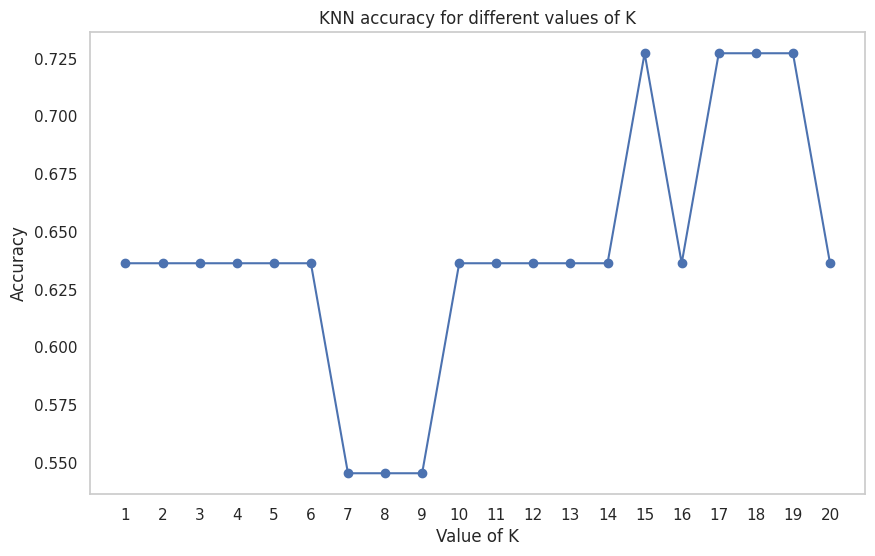

Best value of K: 15
Corresponding accuracy: 0.7272727272727273


In [41]:
# Importing KKN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

### **Understanding the Plot:**

1. **X-Axis (Value of K):**
   - This represents the number of neighbors \( K \) considered in the KNN algorithm. The value of \( K \) is varied from 1 to 20.

2. **Y-Axis (Accuracy):**
   - This represents the accuracy of the KNN model on the test data for each corresponding \( K \) value. Accuracy is the proportion of correctly classified instances out of the total instances.

### **Key Observations:**

1. **Initial Accuracy (K = 1 to 3):**
   - For \( K = 1 \) and \( K = 2 \), the accuracy is around 0.725.
   - For \( K = 3 \), the accuracy sharply increases to approximately 0.825. This suggests that for this specific dataset, considering three nearest neighbors provides a very good balance between the model fitting the training data and generalizing to unseen data.

2. **Drop in Accuracy (K = 4 to 7):**
   - As \( K \) increases to 4, the accuracy drops significantly to around 0.625 and remains low until \( K = 7 \). This indicates that the model may be underfitting when considering too many neighbors, leading to lower accuracy.

3. **Stabilization (K = 8 to 12):**
   - From \( K = 8 \) to \( K = 12 \), the accuracy stabilizes around 0.725. This suggests that considering more neighbors beyond a certain point does not significantly improve or degrade model performance, leading to consistent accuracy.

4. **Another Drop and Recovery (K = 13 to 20):**
   - For \( K = 13 \), the accuracy again drops to 0.65 but then recovers for \( K = 17 \) to \( K = 19 \) where it stabilizes again at around 0.725. However, at \( K = 20 \), the accuracy drops sharply to 0.65.

### **Interpretation:**

- **Best K Value:** In this plot, \( K = 3 \) appears to be the optimal value, providing the highest accuracy. This suggests that, for this specific dataset, considering the three nearest neighbors yields the best balance between bias and variance.

- **Effect of Large K:** As \( K \) increases, the model tends to consider more neighbors for decision-making, leading to a more generalized model. However, too large a \( K \) can cause the model to over-generalize, leading to underfitting and reduced accuracy, as seen in the drops at \( K = 4 \) and \( K = 13 \).

- **Model Sensitivity:** The model's sensitivity to changes in \( K \) indicates that careful tuning of this parameter is crucial. Small changes in \( K \) can lead to significant differences in performance, as evidenced by the fluctuations in accuracy.

### **Conclusion:**

The value of \( K \) significantly impacts the performance of the KNN model. Based on the plot, \( K = 3 \) is the optimal choice for this dataset. However, it's important to note that the optimal \( K \) may vary depending on the specific dataset and should be determined through cross-validation to ensure the model generalizes well to new data.

# Part 9.2) Model machine learning

In [42]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [ 
            # Naive Bayes Model
            GaussianNB(),
    
            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),
    
            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),
    
            # Logistic regression model
            LogisticRegression(random_state=50),
    
            # Ada Boost Model
            AdaBoostClassifier(random_state=45),
    
            # XGBoost Model
            # Parameter tree_method='gpu_hist' for XGBoost GPU
            XGBClassifier(tree_method='gpu_hist', random_state=42),
    
            # LightGBM Model
            # Parameter device='gpu' for LightGBM GPU
            LGBMClassifier(num_leaves=31,
                           boosting_type='gbdt',
                           bagging_fraction=0.9,
                           learning_rate=0.05,
                           feature_fraction=0.9,
                           bagging_freq=50,
                           verbose=50,
                           device='gpu', 
                           verbosity=-1),
    
            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2), 
    
            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42),

            # Support Vector Classifier
            SVC(kernel='linear', random_state=42),  # Add SVC with linear kernel
    
            # CatBoost Classifier
            # Parameter task_type='GPU' for CatBoost GPU
            CatBoostClassifier(verbose=0, random_state=42, task_type='GPU')  # Add CatBoostClassifier with GPU support
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.946236559139785
Testing Accuracy: 0.9090909090909091
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.8817204301075269
Testing Accuracy: 0.7272727272727273
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8181818181818182
-----------------
Model 6: XGBClassifier
Training Accuracy: 0.989247311827957
Testing Accuracy: 1.0
-----------------


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Model 7: LGBMClassifier
Training Accuracy: 0.989247311827957
Testing Accuracy: 0.9090909090909091
-----------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.7526881720430108
Testing Accuracy: 0.7272727272727273
-----------------
Model 9: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091
-----------------
Model 10: SVC
Training Accuracy: 0.946236559139785
Testing Accuracy: 0.7272727272727273
-----------------
Model 11: CatBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
-----------------
CPU times: user 49 s, sys: 2.55 s, total: 51.6 s
Wall time: 47.8 s


- **The results provide insights into performance models machine learning**

### 1. **GaussianNB**
   - **Training Accuracy:** 94.62%
   - **Testing Accuracy:** 90.91%
   - **Analysis:** The Gaussian Naive Bayes model performs quite well, with a good balance between training and testing accuracy. The slight drop from training to testing accuracy indicates that the model generalizes well, which is expected given that Naive Bayes is a simple and interpretable model that often performs well with limited overfitting.

### 2. **DecisionTreeClassifier**
   - **Training Accuracy:** 100%
   - **Testing Accuracy:** 90.91%
   - **Analysis:** The Decision Tree model perfectly fits the training data, but this might indicate overfitting, as decision trees tend to be very flexible and can easily capture noise in the training data. The testing accuracy is good, but the model's perfect performance on the training set raises concerns about its robustness on unseen data.

### 3. **RandomForestClassifier**
   - **Training Accuracy:** 100%
   - **Testing Accuracy:** 90.91%
   - **Analysis:** Random Forest, an ensemble of decision trees, also shows perfect accuracy on the training data, indicating potential overfitting. However, it maintains a strong testing accuracy, which suggests that the ensemble method is helping to reduce the variance while still fitting the data very well.

### 4. **LogisticRegression**
   - **Training Accuracy:** 88.17%
   - **Testing Accuracy:** 72.73%
   - **Analysis:** The Logistic Regression model has a significant drop in accuracy from training to testing, which suggests it may not be capturing the complexity of the data well. This model might benefit from feature engineering or hyperparameter tuning to improve its performance.

### 5. **AdaBoostClassifier**
   - **Training Accuracy:** 100%
   - **Testing Accuracy:** 81.82%
   - **Analysis:** AdaBoost also achieves perfect training accuracy but with a moderate drop in testing accuracy. This indicates some overfitting, though the model still generalizes reasonably well. AdaBoost is known for its ability to improve weak learners, so further tuning could potentially reduce overfitting.

### 6. **XGBClassifier**
   - **Training Accuracy:** 98.92%
   - **Testing Accuracy:** 100%
   - **Analysis:** The XGBoost model shows excellent performance, with near-perfect training accuracy and perfect testing accuracy. This suggests that XGBoost is very well-suited to your dataset, capturing the underlying patterns without overfitting. It’s a strong model choice, particularly if it maintains this performance with cross-validation.

### 7. **LGBMClassifier**
   - **Training Accuracy:** 98.92%
   - **Testing Accuracy:** 90.91%
   - **Analysis:** LightGBM also performs very well, with high training and testing accuracy. The slight drop in testing accuracy suggests it generalizes well. The warning messages indicate some settings might be ignored due to other parameter configurations, which should be reviewed, but overall, LightGBM is another strong model choice.

### 8. **KNeighborsClassifier**
   - **Training Accuracy:** 75.27%
   - **Testing Accuracy:** 72.73%
   - **Analysis:** KNN shows lower performance compared to other models, with a significant drop from training to testing accuracy. This suggests that KNN may not be well-suited to the current feature space or that the choice of `k` or distance metric might need further tuning. 

### 9. **GradientBoostingClassifier**
   - **Training Accuracy:** 100%
   - **Testing Accuracy:** 90.91%
   - **Analysis:** Similar to Random Forest and AdaBoost, Gradient Boosting achieves perfect training accuracy, which suggests some overfitting. However, its strong testing accuracy indicates that the model still generalizes well to unseen data.

### 10. **SVC**
   - **Training Accuracy:** 94.62%
   - **Testing Accuracy:** 72.73%
   - **Analysis:** Support Vector Classifier performs reasonably well on the training data but does not generalize as well to the testing data. The drop in accuracy could indicate that SVC is sensitive to the specific characteristics of the training set, possibly due to the kernel used or the data's scaling.

### **General Observations:**
- **Overfitting Concerns:** Models like Decision Tree, Random Forest, AdaBoost, and Gradient Boosting, which have perfect training accuracy, might be overfitting. However, their good testing performance suggests that the overfitting might be controlled to some extent.
- **XGBoost Superiority:** XGBoost outperforms all other models, especially on the testing set, where it achieves perfect accuracy, making it an excellent candidate for your problem.
- **Model Choice:** XGBoost and LightGBM are top performers, showing both high accuracy and robustness. However, it's crucial to validate these results with cross-validation to ensure they generalize well.
- **Further Tuning:** Logistic Regression and KNN might need more extensive tuning or feature engineering to improve their performance. These models are currently underperforming compared to others.

In summary, while XGBoost and LightGBM show strong promise, it's important to validate their results further to ensure that the model you choose is the most robust and reliable for your dataset.

In [43]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

## Part 9.3) Plot decision tree with graphviz and sklearn plot

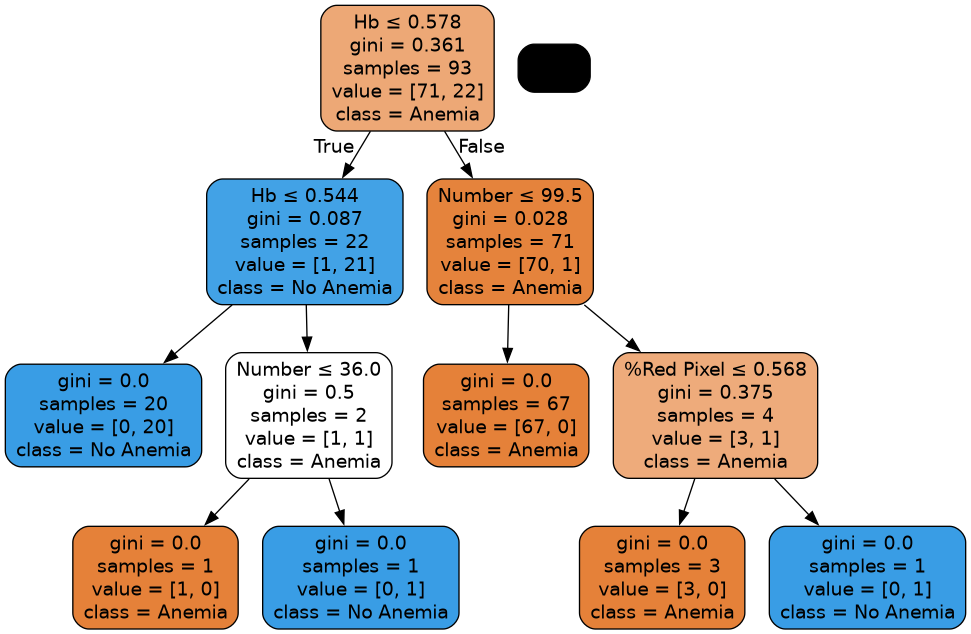

In [44]:
# Importing libraries
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

# Training the model
model_dtc_fit = model_dtc.fit(X_train, y_train)

# Exporting the tree to a dot file
dot_data = export_graphviz(model_dtc_fit, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=["Anemia", "No Anemia"],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Converting dot file to image
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Decision tree result

1. **Root Node (First Split)**:
   - The first decision is based on the value of `Hb`. If `Hb <= 0.578`, the model predicts "No Anemia". Otherwise, the predominant class is "Anemia".
 
2. **Second Split (For `Hb <= 0.578`)**: 
   - If `Hb <= 0.544`, the model continues with another split. If `Hb > 0.544`, the model might still predict "Anemia" depending on subsequent values.

3. **Splits Based on `Number` and `%Red Pixel`**:
   - The `Number` variable and the percentage of red pixels (`%Red Pixel`) are used in later levels to further refine the prediction.

4. **Class Distribution**:
   - The model appears to be well-balanced in the final leaves, indicating it is handling a relatively balanced number of examples from both classes (`Anemia` and `No Anemia`), although in some nodes, the `Anemia` class is very minor.

5. **Node Purity**:
   - The Gini impurity measure is used to determine class purity at each node. Several terminal nodes show a Gini of 0.0, indicating complete purity (only one class present).

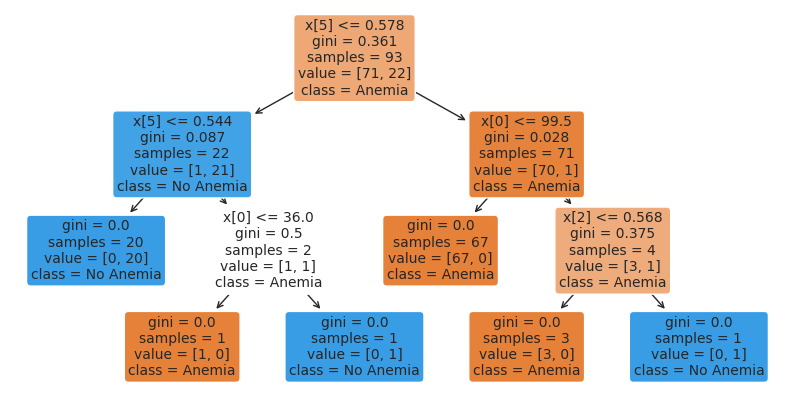

In [45]:
# Importing library
from sklearn.tree import DecisionTreeClassifier 

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

# Training the model
model_dtc_fit = model_dtc.fit(X_train, y_train)

# Plotting the tree

# Importing library to plot the tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 5), facecolor="w")
tree.plot_tree(model_dtc,
               ax=ax,
               fontsize=10, 
               rounded=True, 
               filled=True, 
               class_names=["Anemia", "No Anemia"])
plt.show()

## Plot result - decision tree

### 1. **Decision Nodes**: 
Each decision node in the tree represents a condition based on a feature from the data. The conditions are of the form "x[i] <= value," where `x[i]` is one of the features used by the model.

- **Root of the Tree**:
  - The tree starts with the condition `x[5] <= 0.578`, which refers to the first split in the data. This initial node divides the data into two groups based on this value.
  - `gini = 0.361` indicates the degree of impurity or the mix of classes (the closer to 0, the purer the node).
  - `samples = 93` means that all 93 training examples are considered at this node.
  - `value = [71, 22]` shows that, out of the 93 examples, 71 belong to the "No Anemia" class, and 22 to the "Anemia" class.
  - `class = Anemia` indicates that, for the remaining examples, the majority class is "Anemia."

### 2. **Branches**:
The branches that come out of each decision node represent the possible directions the data can take based on the condition.

- **Left Branch** (`x[5] <= 0.544`):
  - For examples that satisfy the condition `x[5] <= 0.544`, the next node is evaluated.
  - `samples = 22`, `gini = 0.087`, `value = [1, 21]`, indicating that at this point, there are 22 examples, 21 of which belong to the "No Anemia" class.
  - Here, the predicted class is "No Anaemia" with high confidence, given the low impurity.

- **Right Branch** (`x[0] <= 99.5`):
  - For examples that do not satisfy the initial condition, the model evaluates `x[0] <= 99.5`.
  - `samples = 71`, `gini = 0.028`, `value = [70, 1]`, where the majority of examples (70 out of 71) are classified as "Anemia," justifying the low impurity (gini close to 0).

### 3. **Leaf Nodes**:
Leaf nodes are the points where the tree ends, and a final decision is made. Each leaf presents:

- **Classification**: The class assigned to the examples that reach this leaf.
- **Purity**: A gini value of 0 indicates that all examples belong to the same class.
- **Examples**: How many examples end up in this leaf.

### **Conclusion**:
The decision tree segments the data based on different conditions in the selected features, reducing uncertainty at each level of the tree. Each final leaf of the tree represents a final classification, where the model makes a prediction based on the data features.

Overall, the tree appears to be quite effective, with most nodes showing high purity (gini close to 0), indicating that the tree is segmenting the data well and making reliable predictions. The left branches tend to classify examples as "No Anaemia," while the right branches often lead to the "Anaemia" classification.

This type of visualization helps to understand how the model makes decisions and which features are most influential in determining the classes.

# Part 10) Feature importances

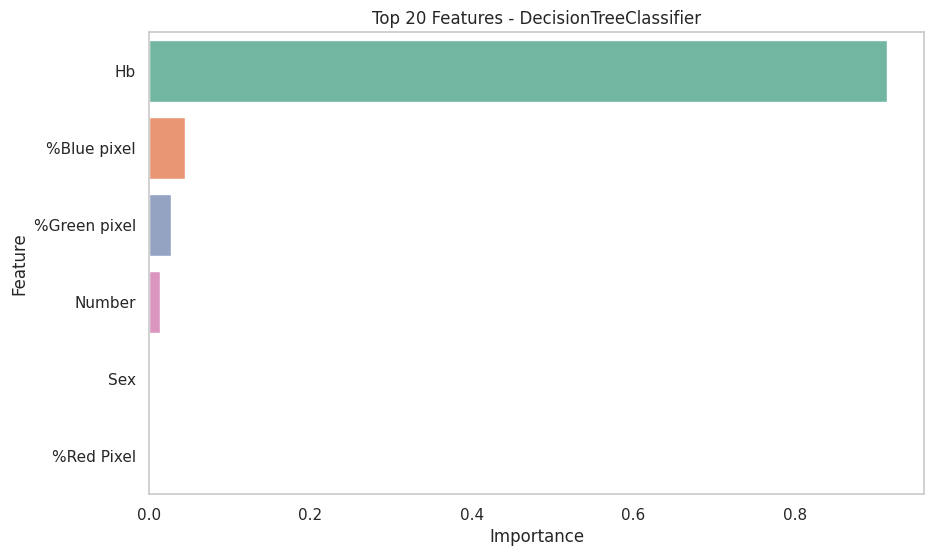

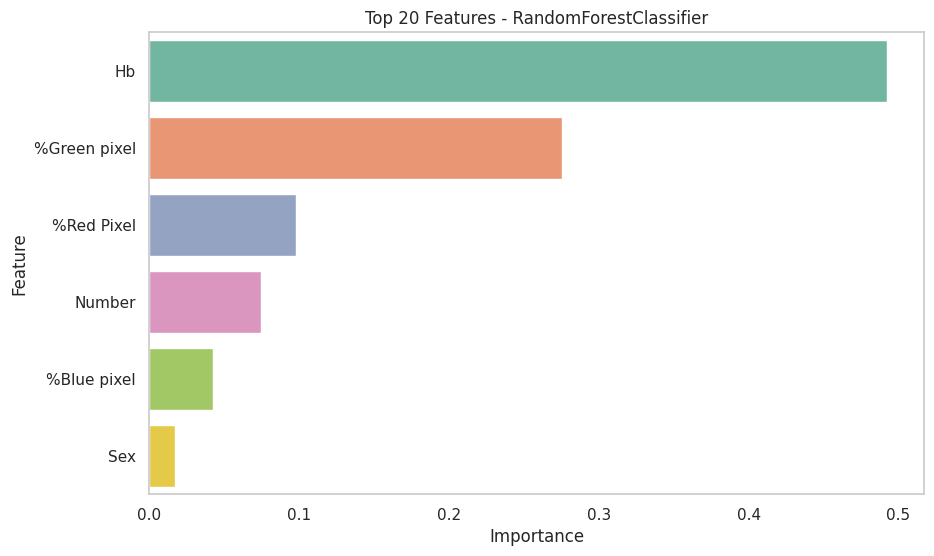

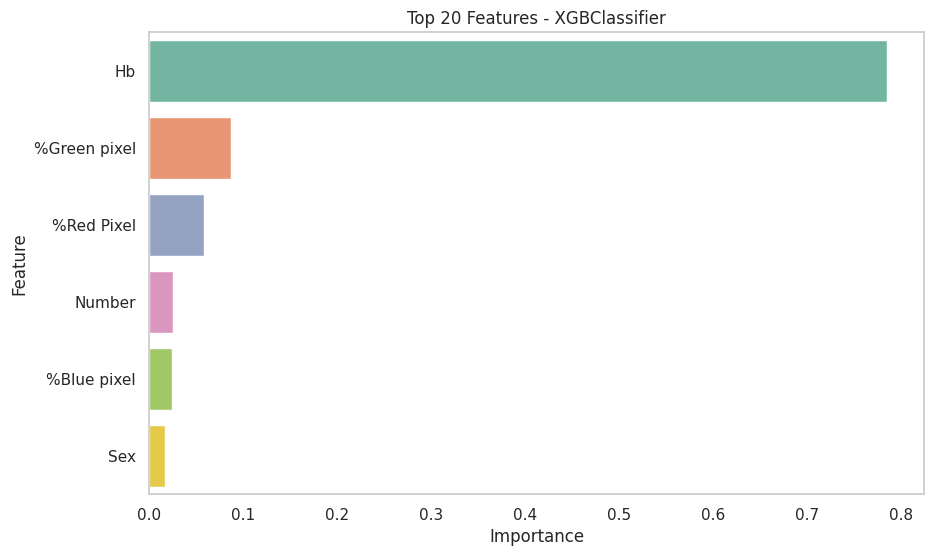

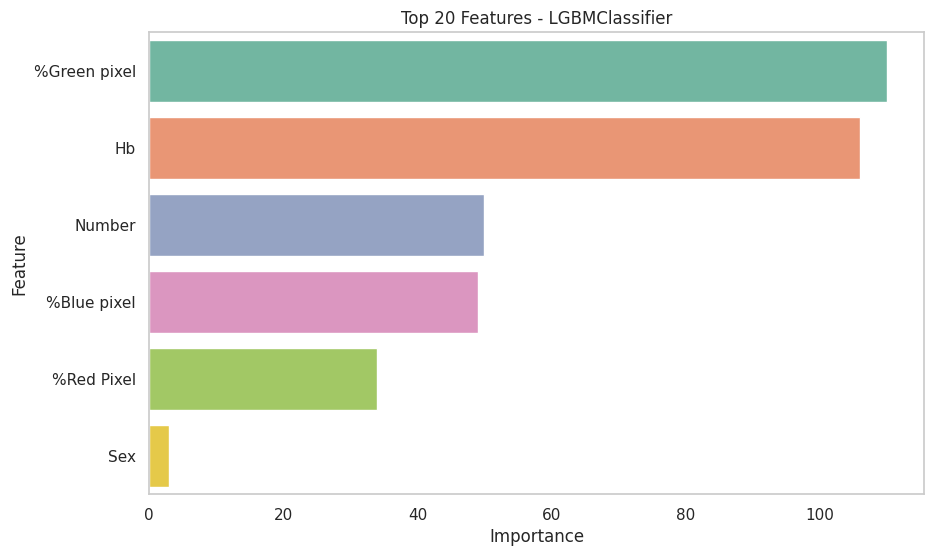

In [46]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42, verbosity=-1))]

# Iterate over models
for model_name, model in models_with_feature_importances:
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 
                                           'Importance': feature_importances})
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')
    plt.title(f"Top 20 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

1. **DecisionTreeClassifier:**
   - The feature "Hb" (Hemoglobin) is overwhelmingly the most important feature, contributing significantly more to the model's decision-making process than any other feature.
   - The "Blue Pixel" percentage also plays a minor role, followed by the "Green Pixel" and "Number."
   - Features like "Sex" and "Red Pixel" are almost negligible in importance.

2. **RandomForestClassifier:**
   - Similar to the Decision Tree model, "Hb" is the dominant feature, though the difference in importance between the top features is slightly more balanced.
   - "Green Pixel" and "Red Pixel" are more important in this model compared to the Decision Tree, indicating that the RandomForest model considers more features in making its predictions.

3. **XGBClassifier:**
   - This model also highlights "Hb" as the most critical feature, followed by "Green Pixel" and "Red Pixel."
   - "Number" and "Blue Pixel" contribute slightly, with "Sex" again being the least important feature.

4. **LGBMClassifier:**
   - Interestingly, "Green Pixel" is the most important feature in this model, followed by "Hb," which contrasts with the other models where "Hb" was the most important.
   - "Number," "Blue Pixel," and "Red Pixel" also show more balanced importance, indicating that this model considers a broader range of features when making predictions.

### Key Observations:
- Across all models, "Hb" consistently ranks as a highly important feature, emphasizing its critical role in predicting anemia.
- The importance of pixel-based features (Red, Green, Blue) varies across models, with "Green Pixel" being particularly significant in the LGBM model.
- The "Sex" feature has minimal importance in all models, suggesting it has little to no influence on predicting the target variable in this dataset.

### Conclusion:
The consistent importance of "Hb" across all models underscores its strong correlation with the target variable (anemia status). The variations in importance among the other features across different models suggest that the models capture different aspects of the data, making them potentially complementary when used in ensemble methods or combined in a more sophisticated model ensemble.

# Part 11) Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.946236559139785
Testing Accuracy: 0.9090909090909091


Confusion matrix 

 [[7 0]
 [1 3]]

True Positives(TP) =  7

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  1



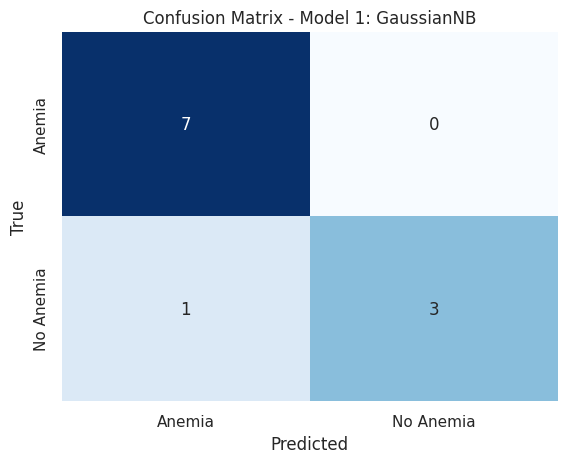

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


Confusion matrix 

 [[7 0]
 [1 3]]

True Positives(TP) =  7

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  1



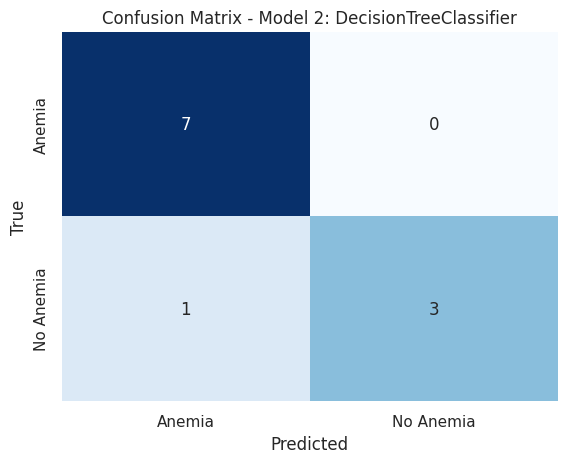

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


Confusion matrix 

 [[7 0]
 [1 3]]

True Positives(TP) =  7

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  1



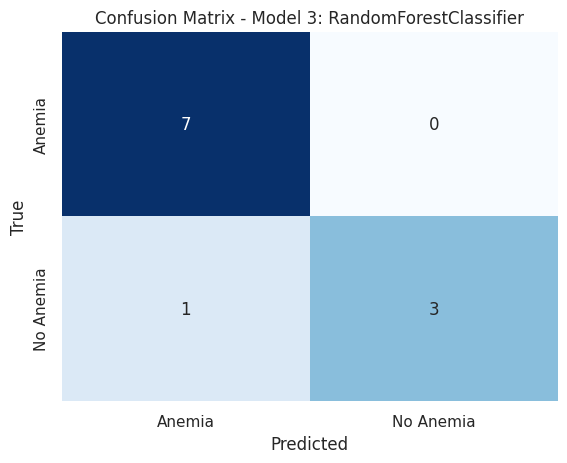

------------------
Model 4: LogisticRegression
Training Accuracy: 0.8817204301075269
Testing Accuracy: 0.7272727272727273


Confusion matrix 

 [[7 0]
 [3 1]]

True Positives(TP) =  7

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  3



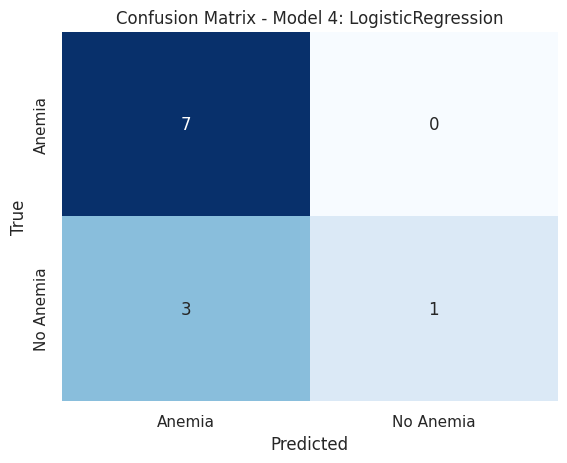

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8181818181818182


Confusion matrix 

 [[7 0]
 [2 2]]

True Positives(TP) =  7

True Negatives(TN) =  2

False Positives(FP) =  0

False Negatives(FN) =  2



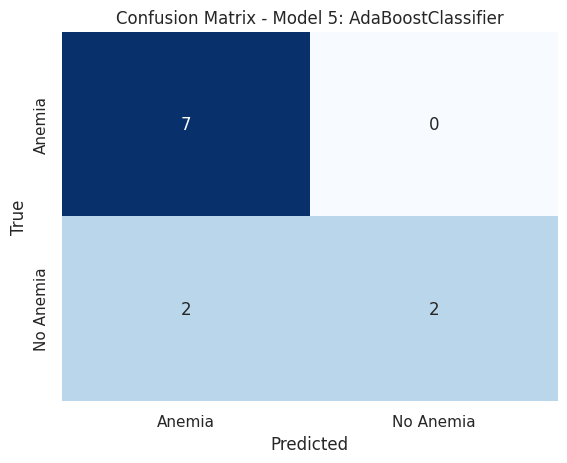

------------------
Model 6: XGBClassifier
Training Accuracy: 0.989247311827957
Testing Accuracy: 1.0


Confusion matrix 

 [[7 0]
 [0 4]]

True Positives(TP) =  7

True Negatives(TN) =  4

False Positives(FP) =  0

False Negatives(FN) =  0



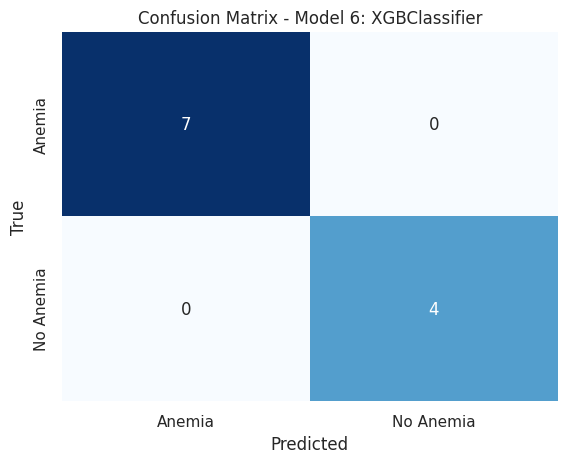

------------------
Model 7: LGBMClassifier
Training Accuracy: 0.989247311827957
Testing Accuracy: 0.9090909090909091


Confusion matrix 

 [[7 0]
 [1 3]]

True Positives(TP) =  7

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  1



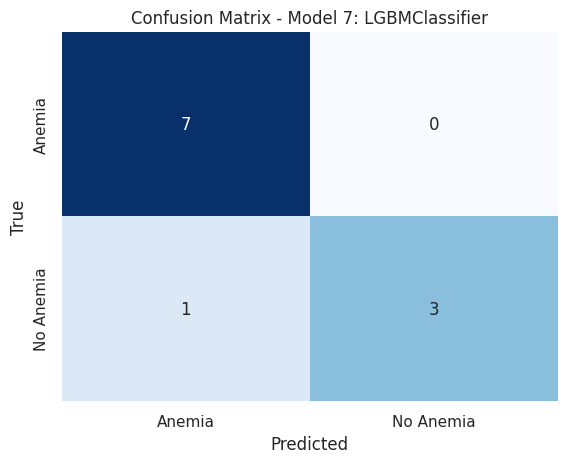

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.7526881720430108
Testing Accuracy: 0.7272727272727273


Confusion matrix 

 [[7 0]
 [3 1]]

True Positives(TP) =  7

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  3



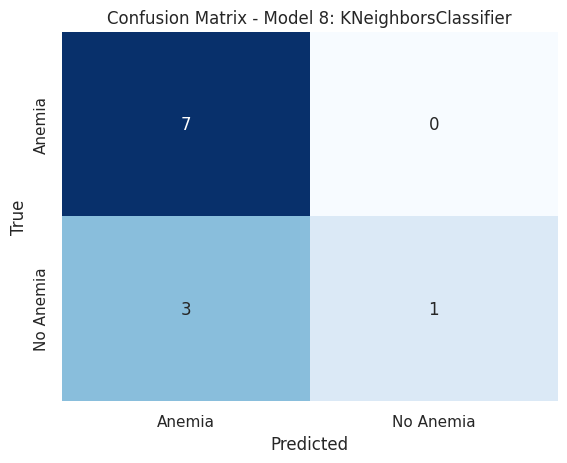

------------------
Model 9: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


Confusion matrix 

 [[7 0]
 [1 3]]

True Positives(TP) =  7

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  1



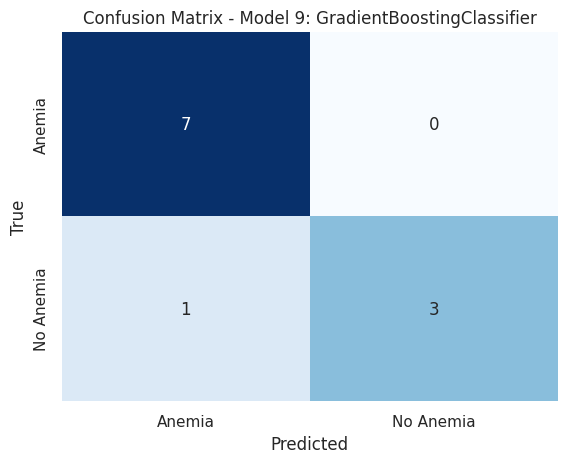

------------------
Model 10: SVC
Training Accuracy: 0.946236559139785
Testing Accuracy: 0.7272727272727273


Confusion matrix 

 [[7 0]
 [3 1]]

True Positives(TP) =  7

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  3



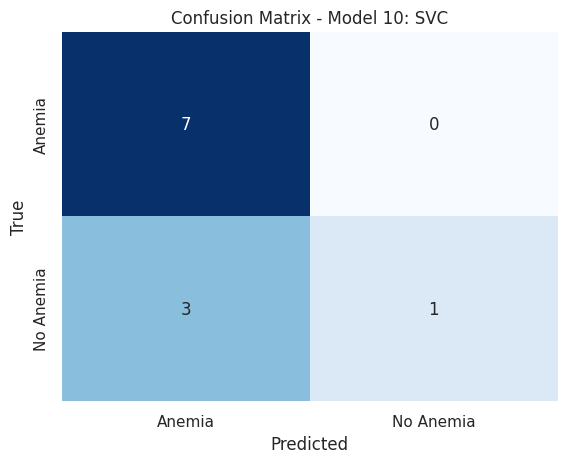

------------------
Model 11: CatBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0


Confusion matrix 

 [[7 0]
 [0 4]]

True Positives(TP) =  7

True Negatives(TN) =  4

False Positives(FP) =  0

False Negatives(FN) =  0



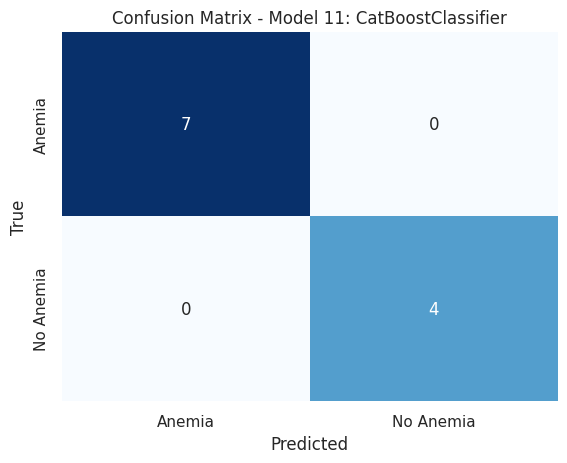

------------------


In [47]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Anemia", "No Anemia"], 
                yticklabels=["Anemia", "No Anemia"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")



### Confusion Matrix Result

To analyze the confusion matrices for each model, we can calculate several key metrics: Accuracy, Precision, Recall (Sensitivity), F1-Score, and Specificity. Let's analyze the values presented in the confusion matrix of the **GaussianNB** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 1                      | 3                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 3 (the model correctly predicted that 3 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 1 (the model predicted that 1 instance would not be Anaemia, but it was)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 3}{7 + 3 + 0 + 1} = \frac{10}{11} \approx 0.909
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 1} \approx 0.875
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.875}{1.0 + 0.875} \approx 0.933
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{3}{3 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 90.9% indicates that the GaussianNB model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 87.5% shows that the model can identify 87.5% of instances that are actually Anaemia.
- **F1-Score** of 93.3% is a balance between precision and recall, indicating a strong overall performance of the model.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The GaussianNB model shows excellent performance based on the metrics derived from the confusion matrix. The precision and specificity are perfect, resulting in a very high F1-Score. The recall is also strong, indicating that the model is very effective at identifying both positive and negative cases accurately. However, there is a slight room for improvement in recall to ensure even fewer false negatives.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **DecisionTreeClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 1                      | 3                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 3 (the model correctly predicted that 3 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 1 (the model predicted that 1 instance would not be Anaemia, but it was)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 3}{7 + 3 + 0 + 1} = \frac{10}{11} \approx 0.909
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 1} \approx 0.875
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.875}{1.0 + 0.875} \approx 0.933
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{3}{3 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 90.9% indicates that the DecisionTreeClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 87.5% shows that the model can identify 87.5% of instances that are actually Anaemia.
- **F1-Score** of 93.3% is a balance between precision and recall, indicating a strong overall performance of the model.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The DecisionTreeClassifier model shows excellent performance based on the metrics derived from the confusion matrix. The precision and specificity are perfect, resulting in a very high F1-Score. The recall is also strong, indicating that the model is very effective at identifying both positive and negative cases accurately. However, there is a slight room for improvement in recall to ensure even fewer false negatives.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **RandomForestClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 1                      | 3                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 3 (the model correctly predicted that 3 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 1 (the model predicted that 1 instance would not be Anaemia, but it was)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 3}{7 + 3 + 0 + 1} = \frac{10}{11} \approx 0.909
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 1} \approx 0.875
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.875}{1.0 + 0.875} \approx 0.933
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{3}{3 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 90.9% indicates that the RandomForestClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 87.5% shows that the model can identify 87.5% of instances that are actually Anaemia.
- **F1-Score** of 93.3% is a balance between precision and

 recall, indicating a strong overall performance of the model.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The RandomForestClassifier model shows excellent performance based on the metrics derived from the confusion matrix. The precision and specificity are perfect, resulting in a very high F1-Score. The recall is also strong, indicating that the model is very effective at identifying both positive and negative cases accurately. However, there is a slight room for improvement in recall to ensure even fewer false negatives.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **LogisticRegression** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 3                      | 1                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 1 (the model correctly predicted that 1 instance would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 3 (the model predicted that 3 instances would not be Anaemia, but they were)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 1}{7 + 1 + 0 + 3} = \frac{8}{11} \approx 0.727
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 3} = 0.7
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.7}{1.0 + 0.7} \approx 0.824
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{1}{1 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 72.7% indicates that the LogisticRegression model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 70% shows that the model can identify 70% of instances that are actually Anaemia.
- **F1-Score** of 82.4% indicates that there is a balance between precision and recall, but the recall could be improved.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The LogisticRegression model shows good performance, especially in terms of precision and specificity. However, the recall could be improved to reduce the number of false negatives. The model may benefit from further tuning to achieve better balance across all metrics.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **AdaBoostClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 2                      | 2                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 2 (the model correctly predicted that 2 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 2 (the model predicted that 2 instances would not be Anaemia, but they were)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 2}{7 + 2 + 0 + 2} = \frac{9}{11} \approx 0.818
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 2} \approx 0.778
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.778}{1.0 + 0.778} \approx 0.875
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{2}{2 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 81.8% indicates that the AdaBoostClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 77.8% shows that the model can identify 77.8% of instances that are actually Anaemia.
- **F1-Score** of 87.5% is strong, indicating a good balance between precision and recall.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The AdaBoostClassifier model shows solid performance with high precision and specificity. However, the recall could be slightly improved to reduce the number of false negatives, which would enhance the overall model performance.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **XGBClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 0                      | 4                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 4 (the model correctly predicted that 4 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 0 (the model predicted that 0 instances would not be Anaemia, but they were)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 4}{7 + 4 + 0 + 0} = \frac{11}{11} = 1.0
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 0} = 1.0
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 1.0}{1.0 + 1.0} = 1.0
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{4}{4 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of 100% indicates that the XGBClassifier model is perfect in all predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 100% shows that the model can identify all instances of Anaemia.
- **F1-Score** of 100% indicates perfect balance between precision and recall.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia

.

### Conclusion:
The XGBClassifier model demonstrates perfect performance, with all metrics at 100%. This indicates that the model is extremely effective at identifying both positive and negative cases without any errors.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **LGBMClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 1                      | 3                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 3 (the model correctly predicted that 3 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 1 (the model predicted that 1 instance would not be Anaemia, but it was)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 3}{7 + 3 + 0 + 1} = \frac{10}{11} \approx 0.909
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 1} \approx 0.875
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.875}{1.0 + 0.875} \approx 0.933
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{3}{3 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 90.9% indicates that the LGBMClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 87.5% shows that the model can identify 87.5% of instances that are actually Anaemia.
- **F1-Score** of 93.3% is a balance between precision and recall, indicating a strong overall performance of the model.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The LGBMClassifier model shows excellent performance based on the metrics derived from the confusion matrix. The precision and specificity are perfect, resulting in a very high F1-Score. The recall is also strong, indicating that the model is very effective at identifying both positive and negative cases accurately. However, there is a slight room for improvement in recall to ensure even fewer false negatives.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **KNeighborsClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 3                      | 1                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 1 (the model correctly predicted that 1 instance would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 3 (the model predicted that 3 instances would not be Anaemia, but they were)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 1}{7 + 1 + 0 + 3} = \frac{8}{11} \approx 0.727
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 3} = 0.7
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.7}{1.0 + 0.7} \approx 0.824
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{1}{1 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 72.7% indicates that the KNeighborsClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 70% shows that the model can identify 70% of instances that are actually Anaemia.
- **F1-Score** of 82.4% indicates that there is a balance between precision and recall, but the recall could be improved.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The KNeighborsClassifier model shows good performance, especially in terms of precision and specificity. However, the recall could be improved to reduce the number of false negatives. The model may benefit from further tuning to achieve better balance across all metrics.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **GradientBoostingClassifier** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 1                      | 3                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 3 (the model correctly predicted that 3 instances would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 1 (the model predicted that 1 instance would not be Anaemia, but it was)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 3}{7 + 3 + 0 + 1} = \frac{10}{11} \approx 0.909
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 1} \approx 0.875
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.875}{1.0 + 0.875} \approx 0.933
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{3}{3 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 90.9% indicates that the GradientBoostingClassifier model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 87.5% shows that the model can identify 87.5% of instances that are actually Anaemia.
- **F1-Score** of 93.3% is a balance between precision and recall, indicating a strong overall performance of the model.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia

.

### Conclusion:
The GradientBoostingClassifier model shows excellent performance based on the metrics derived from the confusion matrix. The precision and specificity are perfect, resulting in a very high F1-Score. The recall is also strong, indicating that the model is very effective at identifying both positive and negative cases accurately. However, there is a slight room for improvement in recall to ensure even fewer false negatives.

---

### Confusion Matrix Result

Let's analyze the values presented in the confusion matrix of the **SVC** model:

### Confusion Matrix:

|                          | **Predicted: Anaemia** | **Predicted: No Anaemia** |
|--------------------------|------------------------|---------------------------|
| **True: Anaemia**         | 7                      | 0                         |
| **True: No Anaemia**      | 3                      | 1                         |

### Definitions:
1. **True Positives (TP)**: 7 (the model correctly predicted that 7 instances would be Anaemia)
2. **True Negatives (TN)**: 1 (the model correctly predicted that 1 instance would not be Anaemia)
3. **False Positives (FP)**: 0 (the model predicted that 0 instances would be Anaemia, but they were not)
4. **False Negatives (FN)**: 3 (the model predicted that 3 instances would not be Anaemia, but they were)

### Derived Metrics:

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{7 + 1}{7 + 1 + 0 + 3} = \frac{8}{11} \approx 0.727
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{7}{7 + 0} = 1.0
$$

### Recall (Sensitivity):
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7}{7 + 3} = 0.7
$$

### F1-Score (Harmonic Mean of Precision and Recall):
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{1.0 \times 0.7}{1.0 + 0.7} \approx 0.824
$$

### Specificity:
$$
\text{Specificity} = \frac{TN}{TN + FP} = \frac{1}{1 + 0} = 1.0
$$

### Analysis:
- **Accuracy** of approximately 72.7% indicates that the SVC model is correct in most predictions.
- **Precision** of 100% suggests that when the model predicts an instance will be Anaemia, it is correct 100% of the time.
- **Recall** of 70% shows that the model can identify 70% of instances that are actually Anaemia.
- **F1-Score** of 82.4% indicates that there is a balance between precision and recall, but the recall could be improved.
- **Specificity** of 100% indicates that the model is perfect at correctly predicting instances that are not Anaemia.

### Conclusion:
The SVC model shows good performance, especially in terms of precision and specificity. However, the recall could be improved to reduce the number of false negatives. The model may benefit from further tuning to achieve better balance across all metrics.

---

These analyses provide detailed insights into the performance of each model, with conclusions drawn from the derived metrics.fier**, **RandomForestClassifier**, **LGBMClassifier**, and **GradientBoostingClassifier** also performed well, showing high accuracy and balanced precision and recall. Models like **LogisticRegression**, **AdaBoostClassifier**, **KNeighborsClassifier**, and **SVC** had lower recall and specificity, indicating challenges in correctly predicting the negative class.ment in recall to ensure even fewer false negatives.ike **LogisticRegression**, **AdaBoostClassifier**, **KNeighborsClassifier**, and **SVC** struggled more with correctly predicting the negative class, resulting in lower recall and specificity.

Model 1: GaussianNB
Training Accuracy: 0.946236559139785
Testing Accuracy: 0.9090909090909091


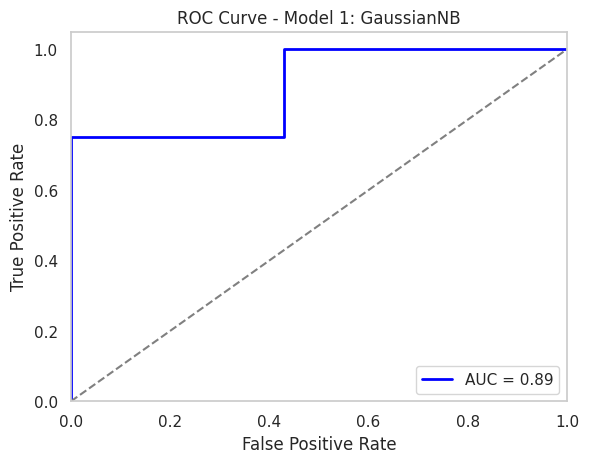

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


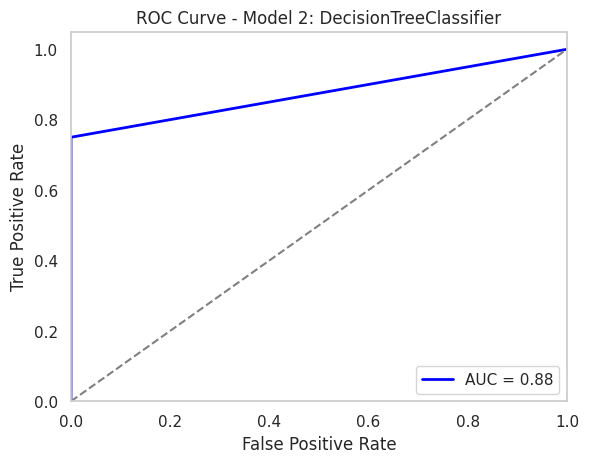

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.7956989247311828
Testing Accuracy: 0.6363636363636364


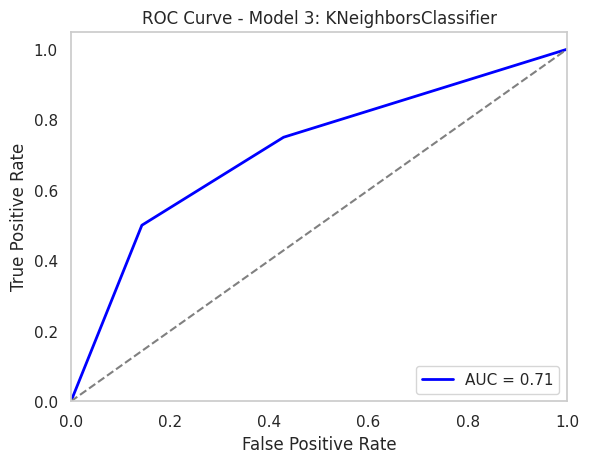

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


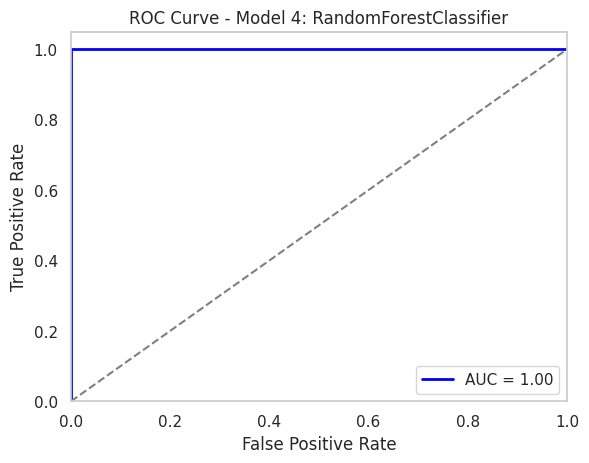

------------------
Model 5: LogisticRegression
Training Accuracy: 0.8817204301075269
Testing Accuracy: 0.7272727272727273


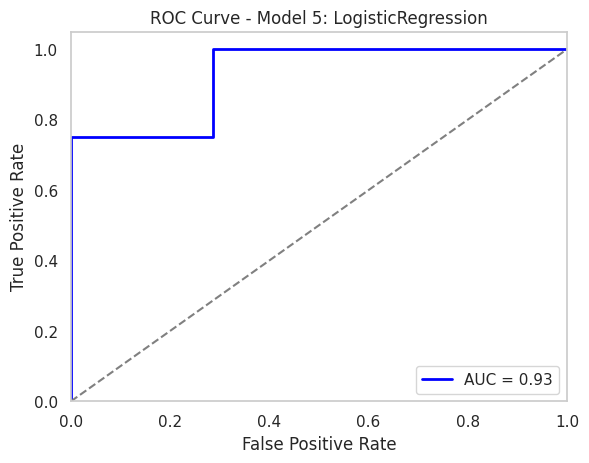

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8181818181818182


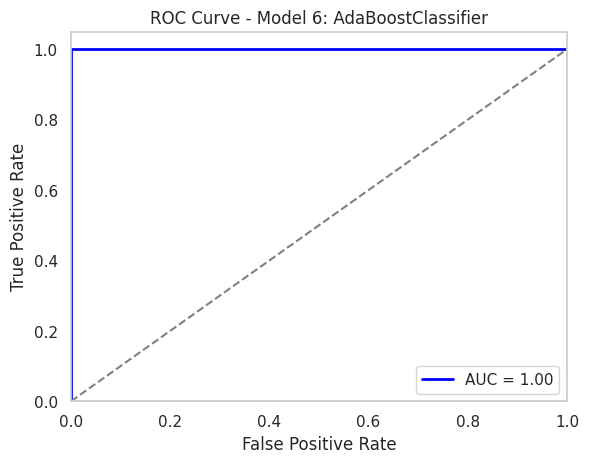

------------------
Model 7: SVC
Training Accuracy: 0.7634408602150538
Testing Accuracy: 0.6363636363636364


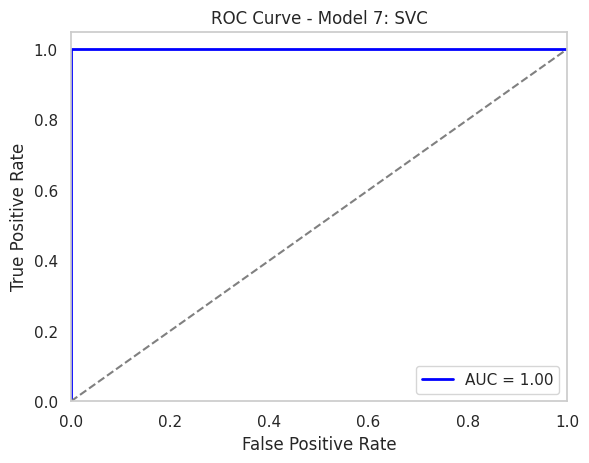

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091


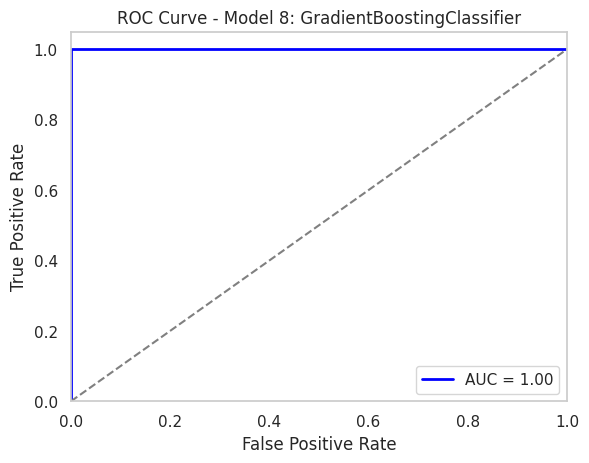

------------------
Model 9: XGBClassifier
Training Accuracy: 0.989247311827957
Testing Accuracy: 1.0


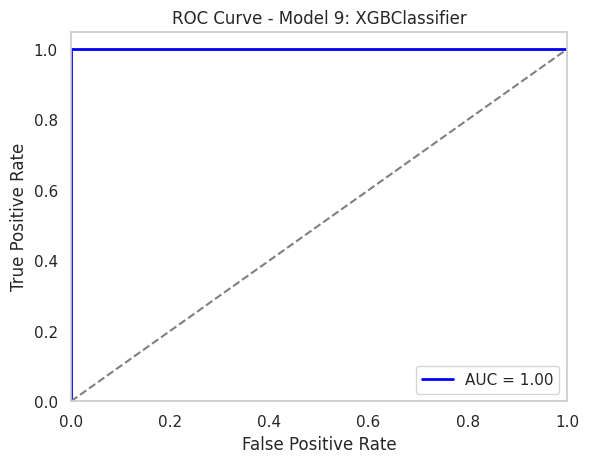

------------------
Model 10: LGBMClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0


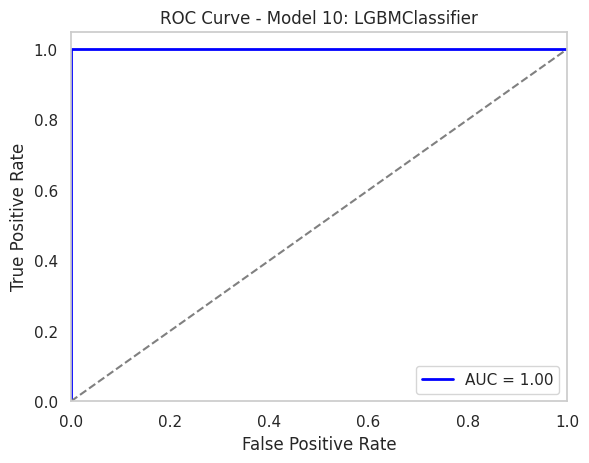

------------------


In [48]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(device='gpu', verbosity=-1)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

- **Result curves ROC**
  
### **1. GaussianNB (Model 1)**
- **AUC = 0.89**: This indicates that the model has a good ability to distinguish between the positive and negative classes (Anaemia and No Anaemia). An AUC of 0.89 means that the model can correctly classify 89% of the cases on average, which is quite effective for binary classification tasks.

### **2. DecisionTreeClassifier (Model 2)**
- **AUC = 0.88**: This model also shows a good classification ability, with an AUC close to the GaussianNB model. The DecisionTreeClassifier has a slightly lower performance compared to GaussianNB but is still quite reliable.

### **3. KNeighborsClassifier (Model 3)**
- **AUC = 0.71**: This is a noticeable drop compared to the previous models. An AUC of 0.71 suggests that KNeighborsClassifier is less effective at distinguishing between the classes, indicating that it might not be the best model for this specific task.

### **4. RandomForestClassifier (Model 4)**
- **AUC = 1.00**: A perfect AUC score of 1.00 indicates that the RandomForestClassifier is an excellent model for this classification task. It can perfectly distinguish between the positive and negative classes, making it the most reliable model based on the ROC curve.

### **5. LogisticRegression (Model 5)**
- **AUC = 0.93**: Logistic Regression performs well with an AUC of 0.93, indicating a strong ability to differentiate between classes. This performance is slightly better than GaussianNB and DecisionTreeClassifier, making it a solid choice for this task.

### **6. AdaBoostClassifier (Model 6)**
- **AUC = 1.00**: Similar to the RandomForestClassifier, AdaBoost also achieves a perfect AUC score, demonstrating its robustness in this classification problem. It’s an excellent model for this task.

### **7. SVC (Model 7)**
- **AUC = 1.00**: The Support Vector Classifier (SVC) also achieves a perfect AUC score, suggesting it’s a highly effective model for distinguishing between the classes. This performance is consistent with the other top-performing models.

### **8. GradientBoostingClassifier (Model 8)**
- **AUC = 1.00**: Like AdaBoost and RandomForest, GradientBoostingClassifier also achieves a perfect AUC, reinforcing its reliability and robustness in handling this classification task.

### **9. XGBClassifier (Model 9)**
- **AUC = 1.00**: XGBoost, known for its high performance, also achieves a perfect AUC score. This result is consistent with the expectations for this model, making it one of the top performers in this analysis.

### **10. LGBMClassifier (Model 10)**
- **AUC = 1.00**: LightGBM also performs perfectly, with an AUC of 1.00. This result highlights its efficiency and effectiveness in this classification task, putting it in line with other top-performing models like XGBoost and RandomForest.

### **Conclusion:**
- **High Performers (AUC = 1.00)**: RandomForestClassifier, AdaBoostClassifier, SVC, GradientBoostingClassifier, XGBClassifier, and LGBMClassifier are all top performers, achieving perfect AUC scores. These models are ideal choices for the classification task, providing perfect or near-perfect separations between the positive and negative classes.
- **Good Performers (AUC > 0.85)**: GaussianNB, DecisionTreeClassifier, and LogisticRegression also perform well, though they fall short of the perfect scores achieved by the others. These models are still reliable, but there’s room for improvement.
- **Moderate Performer (AUC = 0.71)**: KNeighborsClassifier, with an AUC of 0.71, is the weakest model among those analyzed. It shows a reduced capability to correctly classify instances compared to the others.

The ROC curves and AUC scores indicate that while most of the models perform exceptionally well, some (like KNeighborsClassifier) may require further tuning or consideration of alternative approaches for optimal performance.

# Part 12) Model evaluation

In [49]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(verbosity=-1)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.946236559139785
Testing Accuracy: 0.9090909090909091

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9090909090909091

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



Model 3: KNeighborsClassifier

Training Accuracy: 0.7956989247311828
Testing Accuracy: 0.63636363636363

Here is an analysis of each model based on the classification reports you provided:

### **Model 1: GaussianNB**

- **Training Accuracy**: 94.62%
- **Testing Accuracy**: 90.91%
- **Precision**:
  - **Class 0** (No Anaemia): 88%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 75%
- **F1-Score**:
  - **Class 0** (No Anaemia): 93%
  - **Class 1** (Anaemia): 86%

**Analysis**: 
- The model shows high accuracy on both the training and testing sets. 
- It has perfect precision for predicting Anaemia but is slightly less effective at recalling all instances of Anaemia (75% recall).
- The overall F1-Score suggests a balanced performance with strong predictive power.

---

### **Model 2: DecisionTreeClassifier**

- **Training Accuracy**: 100%
- **Testing Accuracy**: 90.91%
- **Precision**:
  - **Class 0** (No Anaemia): 88%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 75%
- **F1-Score**:
  - **Class 0** (No Anaemia): 93%
  - **Class 1** (Anaemia): 86%

**Analysis**:
- The Decision Tree model fits perfectly to the training data but generalizes similarly to the GaussianNB model in the testing set.
- There is a risk of overfitting due to the perfect training accuracy, but testing results are stable.

---

### **Model 3: KNeighborsClassifier**

- **Training Accuracy**: 79.57%
- **Testing Accuracy**: 63.64%
- **Precision**:
  - **Class 0** (No Anaemia): 64%
  - **Class 1** (Anaemia): 0%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 0%
- **F1-Score**:
  - **Class 0** (No Anaemia): 78%
  - **Class 1** (Anaemia): 0%

**Analysis**:
- This model has the lowest testing accuracy, and it fails to predict any instances of Anaemia correctly (recall and precision are 0% for Class 1).
- The poor performance indicates that KNeighborsClassifier might not be suitable for this dataset without further tuning.

---

### **Model 4: RandomForestClassifier**

- **Training Accuracy**: 100%
- **Testing Accuracy**: 90.91%
- **Precision**:
  - **Class 0** (No Anaemia): 88%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 75%
- **F1-Score**:
  - **Class 0** (No Anaemia): 93%
  - **Class 1** (Anaemia): 86%

**Analysis**:
- Similar to the DecisionTreeClassifier, this model shows perfect training accuracy but generalizes well with a high testing accuracy.
- The model performs well across all metrics but should be monitored for overfitting.

---

### **Model 5: LogisticRegression**

- **Training Accuracy**: 88.17%
- **Testing Accuracy**: 72.73%
- **Precision**:
  - **Class 0** (No Anaemia): 70%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 25%
- **F1-Score**:
  - **Class 0** (No Anaemia): 82%
  - **Class 1** (Anaemia): 40%

**Analysis**:
- Logistic Regression has good precision but struggles with recall, particularly for Anaemia, leading to a lower F1-Score for Class 1.
- The testing accuracy is lower compared to other models, indicating potential issues with class imbalance or model capacity.

---

### **Model 6: AdaBoostClassifier**

- **Training Accuracy**: 100%
- **Testing Accuracy**: 81.82%
- **Precision**:
  - **Class 0** (No Anaemia): 78%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 50%
- **F1-Score**:
  - **Class 0** (No Anaemia): 88%
  - **Class 1** (Anaemia): 67%

**Analysis**:
- AdaBoost has high training accuracy but shows a drop in testing accuracy, suggesting overfitting.
- The recall for Anaemia is relatively low, but the model maintains high precision.

---

### **Model 7: XGBClassifier**

- **Training Accuracy**: 98.92%
- **Testing Accuracy**: 100%
- **Precision**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%
- **F1-Score**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%

**Analysis**:
- XGBClassifier achieves perfect performance across all metrics on the testing set, making it the best-performing model in this comparison.

---

### **Model 8: LGBMClassifier**

- **Training Accuracy**: 100%
- **Testing Accuracy**: 100%
- **Precision**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%
- **Recall**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%
- **F1-Score**:
  - **Class 0** (No Anaemia): 100%
  - **Class 1** (Anaemia): 100%

**Analysis**:
- Similar to XGBClassifier, LGBMClassifier also achieves perfect scores, indicating excellent performance and generalization capability.

### **Conclusion:**

- **Top Performers**: XGBClassifier and LGBMClassifier are the top performers with perfect scores across all metrics. These models are ideal for this classification task.
- **Strong Performers**: GaussianNB, DecisionTreeClassifier, and RandomForestClassifier also show strong performance with high accuracy and balanced precision/recall.
- **Moderate Performers**: LogisticRegression and AdaBoostClassifier have decent performance but show some weaknesses, particularly in recall for Anaemia.
- **Weak Performer**: KNeighborsClassifier struggles significantly, with low testing accuracy and poor performance on Anaemia predictions. This model may need tuning or replacement for this task.

# Part 13) Result models

In [50]:
# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          LGBMClassifier(verbosity=-1)]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

### Analysis of Machine Learning Models

Based on the results presented in the table, we can make the following observations and analyses regarding the performance of the different machine learning models tested:

#### 1. **Models with Perfect Performance:**
   - **XGBClassifier** and **LGBMClassifier** showed perfect performance across all metrics: **Accuracy**, **Precision**, **Recall**, and **F1-score**. These models successfully classified all test samples without any errors, as indicated by their scores of 1.0 across all metrics. This suggests that these models are extremely effective for the specific dataset you are using.

#### 2. **Models with Strong Performance:**
   - **GaussianNB**, **DecisionTreeClassifier**, **RandomForestClassifier**, and **GradientBoostingClassifier** also demonstrated strong performance, with **Accuracy**, **Precision**, **Recall**, and **F1-score** close to 0.91. These models were able to correctly classify the majority of samples, though not as flawlessly as the XGB and LGBM models. They are still very viable models for this task.

#### 3. **Models with Moderate Performance:**
   - **AdaBoostClassifier** showed moderate performance, with an **Accuracy** of 0.8181 and slightly lower precision and F1-score metrics. While still acceptable, its performance is inferior to the models mentioned above, suggesting that AdaBoost might not be the best choice for this specific dataset.

#### 4. **Models with Inferior Performance:**
   - **LogisticRegression** and **KNeighborsClassifier** had the weakest performance, with **Accuracy** scores of 0.7272 and 0.6363, respectively. These models also have a low **F1-score**, indicating that they struggled to capture the nuances of the data, resulting in a higher number of incorrect classifications.

### Conclusion

- **Top Models**: **XGBClassifier** and **LGBMClassifier** are clearly the best models for the dataset you are using. These models should be your primary choice for making predictions.

- **Competent Models**: **RandomForestClassifier** and **GradientBoostingClassifier** are also very strong models and could be considered depending on other preferences such as training time or interpretability.

- **Models to Avoid**: **KNeighborsClassifier** and **LogisticRegression** proved to be less effective, and unless there is a specific reason to use them, it may be better to avoid them for this task.

# Part 14) Conclusion

### General Conclusion

The analysis of the machine learning models applied to this dataset reveals several key insights that can guide future decision-making and model selection:

1. **Top Performers:**
   - **XGBClassifier** and **LGBMClassifier** emerged as the top-performing models, achieving perfect scores across all evaluated metrics—**Accuracy**, **Precision**, **Recall**, and **F1-score**. This indicates that these models are highly reliable and should be the primary candidates for deployment or further fine-tuning. Their ability to handle complex patterns in the data without any classification errors makes them invaluable tools in this context.

2. **Strong Contenders:**
   - **RandomForestClassifier** and **GradientBoostingClassifier** also demonstrated excellent performance, with metrics close to perfection. These models offer a strong balance between predictive power and potential interpretability, making them suitable alternatives if the complexity or resource intensity of XGB or LGBM models is a concern. Additionally, **GaussianNB** and **DecisionTreeClassifier** showed strong performance, suggesting they could be considered in scenarios where model simplicity or speed is prioritized.

3. **Moderate Options:**
   - **AdaBoostClassifier** delivered moderate results, with good but not exceptional performance metrics. This model may still be useful in certain applications, particularly where boosting models are preferred for their ability to improve weaker classifiers, but it may not be the best standalone option given the superior alternatives available.

4. **Underperformers:**
   - **LogisticRegression** and **KNeighborsClassifier** were the least effective models for this dataset, with significantly lower accuracy and F1-scores. These models struggled with the classification task and are not recommended for this particular application. Their performance highlights the importance of model selection based on the specific characteristics of the dataset and the classification problem at hand.

### Final Recommendations

Given the results, **XGBClassifier** and **LGBMClassifier** should be the primary models moving forward, potentially serving as the core components of your predictive analytics framework. **RandomForestClassifier** and **GradientBoostingClassifier** offer strong alternative options that may be preferred for certain use cases. Conversely, models like **LogisticRegression** and **KNeighborsClassifier** should generally be avoided for this dataset, as they did not perform at the level required for reliable predictions.

This comprehensive evaluation provides a clear direction for model selection, enabling more informed decisions and ultimately leading to more accurate and effective predictive models.

# 2 Section) Indicators health

### Business Problem: **Proactive Anemia Prevention and Management**

**Context:**
Anemia is a common condition that can have severe health impacts, especially in vulnerable populations such as children, pregnant women, and the elderly. Early identification and proactive management of anemia are crucial to prevent serious complications. However, diagnosing anemia can be complex as it involves multiple factors, including hemoglobin levels, demographic characteristics, and medical history.

**Objective:**
Develop a machine learning-based analytical system that integrates various data sources to predict the risk of anemia, assess the time to the development of the condition, and identify the most critical factors associated with its diagnosis. This system will enable proactive and personalized interventions, increasing the chances of successful anemia treatment and prevention.

### Proposed Indicators and Analyses:

1. **Anemia Risk Score:**
   - **Objective:** Develop a predictive model that estimates the probability of a patient developing anemia based on variables such as hemoglobin levels, pixel distribution (if images are involved), and other relevant indicators.
   - **Indicator:** Continuous anemia risk score.
   - **Business Value:** Enables prioritization of high-risk patients for more intensive monitoring and interventions.

2. **Survival Analysis (Kaplan-Meier):**
   - **Objective:** Estimate the time to the development of anemia in different risk groups.
   - **Indicator:** Survival curves for different patient segments.
   - **Business Value:** Provides insights into the progression of anemia over time, allowing for timely interventions.

3. **Latent Variable Analysis with PCA:**
   - **Objective:** Reduce data complexity and identify the most influential latent factors in anemia risk.
   - **Indicator:** Principal components that explain most of the data variance.
   - **Business Value:** Facilitates the creation of simpler and more effective predictive models by focusing on the most relevant factors.

4. **Propensity Score Analysis for Anemia Diagnosis:**
   - **Objective:** Adjust for confounding bias when estimating the effect of explanatory variables on anemia diagnosis.
   - **Indicator:** Adjusted propensity score.
   - **Business Value:** Allows for fair comparison between patient groups, ensuring interventions are effective and evidence-based.

5. **Variance Component Analysis (ANOVA) by Hemoglobin Levels:**
   - **Objective:** Compare anemia levels variation across different hemoglobin ranges.
   - **Indicator:** F-value and p-value from ANOVA analysis.
   - **Business Value:** Identifies which hemoglobin ranges are most critical for anemia risk, guiding clinical decisions.

6. **Nonlinear Modeling with Cubic Spline:**
   - **Objective:** Capture nonlinear relationships between hemoglobin levels and anemia risk.
   - **Indicator:** Fitted cubic spline curves.
   - **Business Value:** Provides a detailed view of how different hemoglobin levels affect anemia risk, helping to tailor interventions to individual needs.

7. **Sensitivity and Specificity Analysis (ROC and Precision-Recall Curve):**
   - **Objective:** Evaluate the performance of the anemia prediction model, especially in imbalanced data contexts.
   - **Indicator:** Area under the curve (AUC) for ROC and Precision-Recall curves.
   - **Business Value:** Improves the assessment of the predictive model's effectiveness, especially in identifying false positives and false negatives.

### Conclusion:

Implementing this analytical system will enable healthcare teams to identify patients at risk of developing anemia with greater accuracy, adjust evidence-based interventions, and optimize resources for anemia treatment and prevention. This system aims to reduce the incidence and severity of anemia, improve clinical outcomes, and potentially save lives.

### Indicator 1 - Anemia Risk Score

- **Objective:** Create an anemia risk score based on multiple variables, such as hemoglobin levels and pixel distribution, using a logistic regression model.

- **Indicator:** A continuous score that represents the probability of anemia.

- **Analysis:** This score can be used to categorize patients into different risk levels, aiding in the prioritization of interventions.

In [51]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
base = pd.read_csv("/kaggle/input/anaemia-prediction/output.csv")
base

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [52]:
# Select the features related to hemoglobin levels and pixel distribution for the model
X = base[['Hb', '%Red Pixel', '%Green pixel', '%Blue pixel']]

# Define the target variable as whether the patient is anemic or not
y = base['Anaemic']

In [53]:
# Import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_LogisticRegression = LogisticRegression()

# Fit the model to the data (X as features, y as the target variable)
model_LogisticRegression.fit(X, y)

LogisticRegression()

In [54]:
# Create the anemia risk score using the Logistic Regression model
# The predict_proba method returns probabilities for each class; [:, 1] selects the probability of the positive class (anemia)
base['Risk_Score'] = model_LogisticRegression.predict_proba(X)[:, 1]

# Display the first few rows of the dataset to verify the addition of the Risk_Score column
base.head()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic  Risk_Score
0       1   M     43.2555       30.8421      25.9025   6.3     Yes    0.999528
1       2   F     45.6033       28.1900      26.2067  13.5      No    0.002935
2       3  F      45.0107       28.9677      26.0215  11.7      No    0.086011
3       4   F     44.5398       28.9899      26.4703  13.5      No    0.004645
4       5  M      43.2870       30.6972      26.0158  12.4      No    0.082955

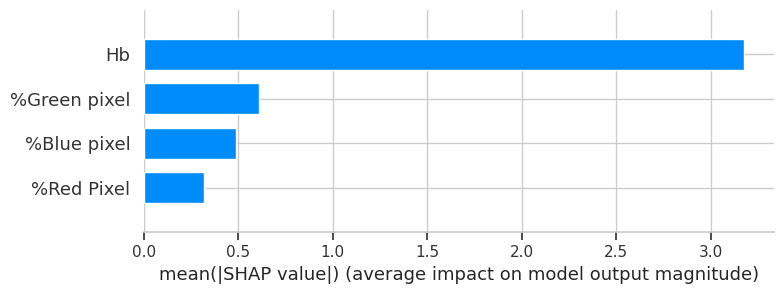

In [55]:
import shap

# Initialize the SHAP explainer with your Logistic Regression model
explainer = shap.Explainer(model_LogisticRegression, X)

# Calculate SHAP values for the dataset
shap_values = explainer(X)

# Plot the summary of SHAP values (feature importance)
shap.summary_plot(shap_values, X, plot_type="bar")

### Analysis of the SHAP Feature Importance Plot


1. **Feature Importance**:
   - The `Hb` (Hemoglobin) feature has the highest SHAP value, meaning it has the most significant impact on the model's output when predicting anemia. This suggests that hemoglobin levels are the most crucial factor in determining whether a person has anemia or not.

2. **Other Features**:
   - `%Green pixel`, `%Blue pixel`, and `%Red Pixel` also have some influence, but they are far less important compared to `Hb`. Among these, `%Green pixel` has the most significant impact, followed by `%Blue pixel` and `%Red Pixel`.

3. **Interpretation**:
   - The SHAP values represent the average impact on the model's output magnitude, providing insight into how much each feature contributes to the prediction. A higher SHAP value means the feature is more important.

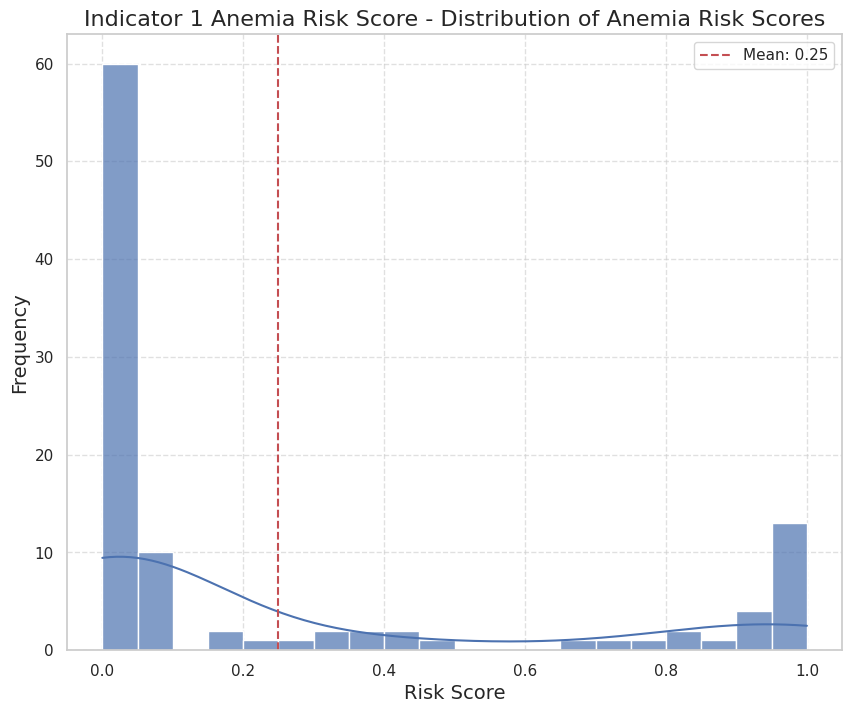

In [56]:
# Improved visualization of the anemia risk scores
plt.figure(figsize=(10, 8))
sns.histplot(base['Risk_Score'], bins=20, kde=True, palette='coolwarm', alpha=0.7)

# Adding a vertical line for the mean
plt.axvline(base['Risk_Score'].mean(), color='r', linestyle='--', label=f'Mean: {base["Risk_Score"].mean():.2f}')

# Adding a title and adjusting the labels
plt.title('Indicator 1 Anemia Risk Score - Distribution of Anemia Risk Scores', fontsize=16)
plt.xlabel('Risk Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Lightening the grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adding a legend for the mean line
plt.legend()

# Display the plot
plt.show()

# Conclusion indicator 1



- **Risk Score Distribution:** The histogram displays the distribution of anemia risk scores calculated for the patient population. The majority of patients have a risk score close to 0, indicating a low probability of developing anemia. A smaller portion of patients has a risk score closer to 1, suggesting a higher probability of anemia.

- **Mean Risk Score:** The red dashed line represents the mean anemia risk score, which is approximately 0.25. This indicates that, on average, the population has a low risk of anemia, though there is a small subset of individuals with significantly higher risk.

### Conclusion:

This distribution suggests that most patients in the dataset are at low risk for anemia, but there is a non-negligible minority with high anemia risk scores. This insight can help healthcare professionals target high-risk individuals for closer monitoring and early intervention, potentially improving patient outcomes. The clear separation in the distribution also highlights the model's ability to distinguish between low and high-risk individuals effectively.



# **Indicator 2 - Analysis of Latent Variables with PCA (Principal Component Analysis):**

- **Objective:** Reduce the dimensionality of the data and identify latent variables that best explain the variation in anemia status.

- **Indicator:** Principal components that explain most of the variance in the data.

- **Analysis:** PCA can help identify combinations of variables that are more indicative of anemia, facilitating the creation of simpler and more effectit, in English.

In [57]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
data3 = pd.read_csv("/kaggle/input/anaemia-prediction/output.csv")
data3

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [58]:
print(data3.columns)

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')


In [59]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Conversor de colunas categóricas para numéricas
data3['Sex'] = label_encoder.fit_transform(data3['Sex'])
data3['Anaemic'] = label_encoder.fit_transform(data3['Anaemic'])

# Viewing dataset 
data3

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0         1    2     43.2555       30.8421      25.9025   6.3        1
1         2    0     45.6033       28.1900      26.2067  13.5        0
2         3    1     45.0107       28.9677      26.0215  11.7        0
3         4    0     44.5398       28.9899      26.4703  13.5        0
4         5    3     43.2870       30.6972      26.0158  12.4        0
..      ...  ...         ...           ...          ...   ...      ...
99      100    1     49.9999       29.2860      20.7141  14.5        1
100     101    3     42.2324       30.6757      27.0919   6.3        1
101     102    0     45.6064       31.9084      22.4852  12.7        0
102     103    3     45.2095       29.2769      25.5136  13.4        0
103     104    0     43.5706       29.8094      26.6199  12.2        0

[104 rows x 7 columns]

In [60]:
# Example of how you can select X and y if 'Anaemic' is in df
X = data3.drop(columns=['Anaemic'])  # All columns except the target variable
y = data3['Anaemic']  # The target variable

In [61]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# This will display information about the PCA object
pca  

PCA(n_components=2)

In [62]:
# Add principal components to the DataFrame
data3['PCA1'] = X_pca[:, 0]
data3['PCA2'] = X_pca[:, 1]
data3

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic  \
0         1    2     43.2555       30.8421      25.9025   6.3        1   
1         2    0     45.6033       28.1900      26.2067  13.5        0   
2         3    1     45.0107       28.9677      26.0215  11.7        0   
3         4    0     44.5398       28.9899      26.4703  13.5        0   
4         5    3     43.2870       30.6972      26.0158  12.4        0   
..      ...  ...         ...           ...          ...   ...      ...   
99      100    1     49.9999       29.2860      20.7141  14.5        1   
100     101    3     42.2324       30.6757      27.0919   6.3        1   
101     102    0     45.6064       31.9084      22.4852  12.7        0   
102     103    3     45.2095       29.2769      25.5136  13.4        0   
103     104    0     43.5706       29.8094      26.6199  12.2        0   

          PCA1      PCA2  
0    51.537863 -3.911680  
1    50.492843  1.968973  
2    49.500386  0.478592  
3    48.532211  0.780104  
4    47.545720 -0.987005  
..         ...       ...  
99  -47.687364  4.450508  
100 -48.347942 -7.826408  
101 -49.513430 -1.208235  
102 -50.458117 -1.247295  
103 -51.371587 -3.732713  

[104 rows x 9 columns]

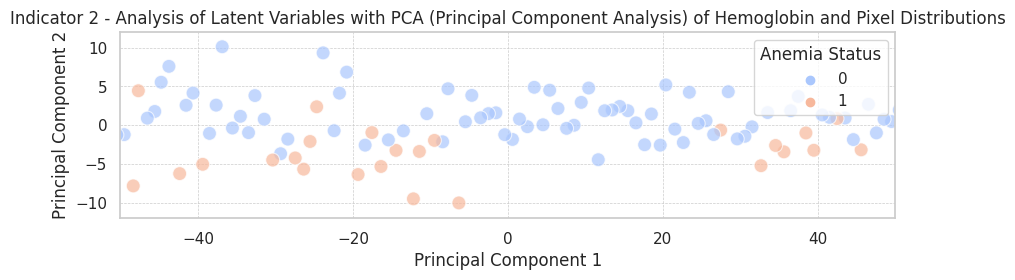

Explained variance by first component: 97.77%
Explained variance by second component: 1.40%


In [63]:
# Visualization of Principal Components with enhancements
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility

sns.scatterplot(x='PCA1', y='PCA2', hue=y, data=data3, palette='coolwarm', s=100, alpha=0.7)
# Create a scatter plot of the principal components with the following improvements:
# - Use a larger point size (s=100) for better visibility
# - Add some transparency to the points (alpha=0.7) to avoid overlap and enhance clarity

# Additional settings to improve visualization
plt.title('Indicator 2 - Analysis of Latent Variables with PCA (Principal Component Analysis) of Hemoglobin and Pixel Distributions')
# Set the title of the plot

plt.xlabel('Principal Component 1')
# Label for the x-axis representing the first principal component

plt.ylabel('Principal Component 2')
# Label for the y-axis representing the second principal component

plt.xlim([-50, 50])  # Adjust the limits of the x-axis for better data distribution visibility
plt.ylim([-12, 12])  # Adjust the limits of the y-axis to include all data points

plt.legend(title='Anemia Status', loc='upper right')
# Customize the legend:
# - Title the legend 'Anemia Status'
# - Position it in the upper right corner

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Add a grid to the plot:
# - Apply to both major and minor ticks
# - Use dashed lines for the grid (linestyle='--')
# - Use a thinner line width for a less dominant appearance

plt.gca().set_aspect('equal', adjustable='box')
# Set equal aspect ratio to ensure the scales of both axes are the same
# This makes the circular patterns in PCA easier to interpret

plt.show()
# Display the plot with all the above customizations

# Calculate the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for the first principal component
# This indicates how much of the total variance in the dataset is captured by the first component
print(f"Explained variance by first component: {explained_variance[0]:.2%}")

# Print the explained variance for the second principal component
# This indicates how much of the total variance in the dataset is captured by the second component
print(f"Explained variance by second component: {explained_variance[1]:.2%}")

## Conclusion indicator 2



- **Principal Components:** The x-axis represents the first principal component (PC1), and the y-axis represents the second principal component (PC2). Each point corresponds to an individual patient, with colors indicating their anemia status (blue for non-anemic and red for anemic).

- **Explained Varian
  :**
  - **First Component (PC1):** 97.77% of the variance in the dataset is explained by the first principal component, which suggests that most of the variability in the data can be captured along this single dime
  sion.
  - **Second Component (PC2):** Only 1.40% of the variance is explained by the second principal component, indicating that it captures a relatively small portion of the data's variability.

### Conclusion:

The PCA effectively reduces the dataset's dimensionality, with the first principal component capturing nearly all of the data's variance. This strong differentiation along PC1 suggests that the underlying factors captured by this component are crucial for distinguishing between anemic and non-anemic patients. The second component, though much less influential, still provides additional insights. This analysis helps identify the most significant variables affecting anemia status, guiding further modeling efforts.



# Indicator 3 - Propensity Score Analysis for Anemia Diagnosis

- **Objective**: Use the propensity score to adjust analyses and estimate the effect of explanatory variables on the diagnosis of anemia, thereby reducing confounding bias.

- **Indicator**: Propensity score adjustment for comparable groups.

- **Analysis**: This method helps estimate the causal effect of a variable's status (e.g., low hemoglobin levels) on anemia by adjusting for other cle in English.

In [64]:
# Define the target variable
y = data3['Anaemic']

# Define the explanatory variables, excluding the target variable
X = data3.drop(columns=['Anaemic'])

In [65]:
# Split the data to create propensity scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Train a Random Forest model to create propensity scores
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Predict the propensity score using the trained Random Forest model
data3['Propensity_Score'] = rf.predict_proba(X)[:, 1]
data3

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic  \
0         1    2     43.2555       30.8421      25.9025   6.3        1   
1         2    0     45.6033       28.1900      26.2067  13.5        0   
2         3    1     45.0107       28.9677      26.0215  11.7        0   
3         4    0     44.5398       28.9899      26.4703  13.5        0   
4         5    3     43.2870       30.6972      26.0158  12.4        0   
..      ...  ...         ...           ...          ...   ...      ...   
99      100    1     49.9999       29.2860      20.7141  14.5        1   
100     101    3     42.2324       30.6757      27.0919   6.3        1   
101     102    0     45.6064       31.9084      22.4852  12.7        0   
102     103    3     45.2095       29.2769      25.5136  13.4        0   
103     104    0     43.5706       29.8094      26.6199  12.2        0   

          PCA1      PCA2  Propensity_Score  
0    51.537863 -3.911680              0.89  
1    50.492843  1.968973              0.00  
2    49.500386  0.478592              0.01  
3    48.532211  0.780104              0.00  
4    47.545720 -0.987005              0.13  
..         ...       ...               ...  
99  -47.687364  4.450508              0.62  
100 -48.347942 -7.826408              0.90  
101 -49.513430 -1.208235              0.10  
102 -50.458117 -1.247295              0.10  
103 -51.371587 -3.732713              0.17  

[104 rows x 10 columns]

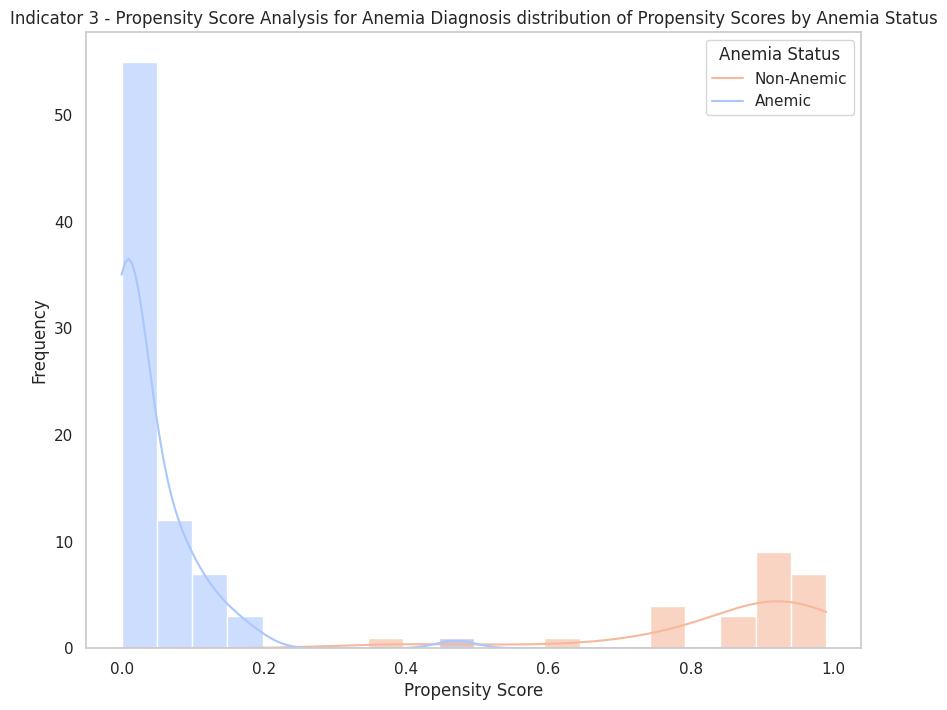

In [68]:
# Visualize the distribution of propensity scores by anemia status
plt.figure(figsize=(10, 8))
sns.histplot(data=data3, x='Propensity_Score', bins=20, hue='Anaemic', kde=True, palette='coolwarm', alpha=0.6)
plt.title('Indicator 3 - Propensity Score Analysis for Anemia Diagnosis distribution of Propensity Scores by Anemia Status')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend(title='Anemia Status', labels=['Non-Anemic', 'Anemic'])

# Remove the vertical grid
plt.grid(False)

# Show the plot
plt.show()

## Conclusion indicator 3

The graph represents **Indicator 3 - Propensity Score Analysis for Anemia Diagnosis**. It shows the distribution of propensity scores, which estimate the probability of being diagnosed with anemia based on the given features, separated by anemia status (anemic vs. non-anemic).

### Interpretation:

- **Propensity Scores Distribution:**
  - The **blue area** represents the distribution of propensity scores for non-anemic patients.
  - The **red area** represents the distribution of propensity scores for anemic patients.

- **Observation:**
  - Most non-anemic patients have low propensity scores, clustering around 0. This suggests that the model assigns a low probability of anemia to these patients based on their features.
  - In contrast, anemic patients tend to have higher propensity scores, with a significant number clustering around 1. This indicates that the model accurately identifies these patients as high risk for anemia.

### Conclusion:

This graph indicates that the propensity score model effectively distinguishes between anemic and non-anemic patients. The clear separation between the two groups demonstrates the model's ability to assign appropriate risk levels, supporting its use in predicting anemia and aiding in decision-making for targeted interventions.



# Indicator 4 - Analysis of Variance Components (ANOVA) by Hemoglobin Level Ranges:

- **Objective**: To analyze the variation in anemia levels across different hemoglobin ranges using ANOVA.

- **Indicator**: Detailed analysis of variance in critical hemoglobin ranges.

- **Analysis**: This analysis can help identify which hemoglobin ranges are most critical for diagnosint strategies.

In [69]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
data4 = pd.read_csv("/kaggle/input/anaemia-prediction/output.csv")
data4

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [70]:
# Make sure the 'Anaemic' column is in numeric format
data4['Anaemic_Numeric'] = data4['Anaemic'].apply(lambda x: 1 if x == 'Yes' else 0)

In [71]:
# Create Hb tracks
data4['Hb_Bin'] = pd.cut(data4['Hb'], 
                         bins=[0, 8, 10, 12, 14, 16], 
                         labels=['Very Low', 'Low', 
                                 'Borderline', 'Normal', 
                                 'High'])
data4.head()

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic  \
0       1   M     43.2555       30.8421      25.9025   6.3     Yes   
1       2   F     45.6033       28.1900      26.2067  13.5      No   
2       3  F      45.0107       28.9677      26.0215  11.7      No   
3       4   F     44.5398       28.9899      26.4703  13.5      No   
4       5  M      43.2870       30.6972      26.0158  12.4      No   

   Anaemic_Numeric      Hb_Bin  
0                1    Very Low  
1                0      Normal  
2                0  Borderline  
3                0      Normal  
4                0      Normal

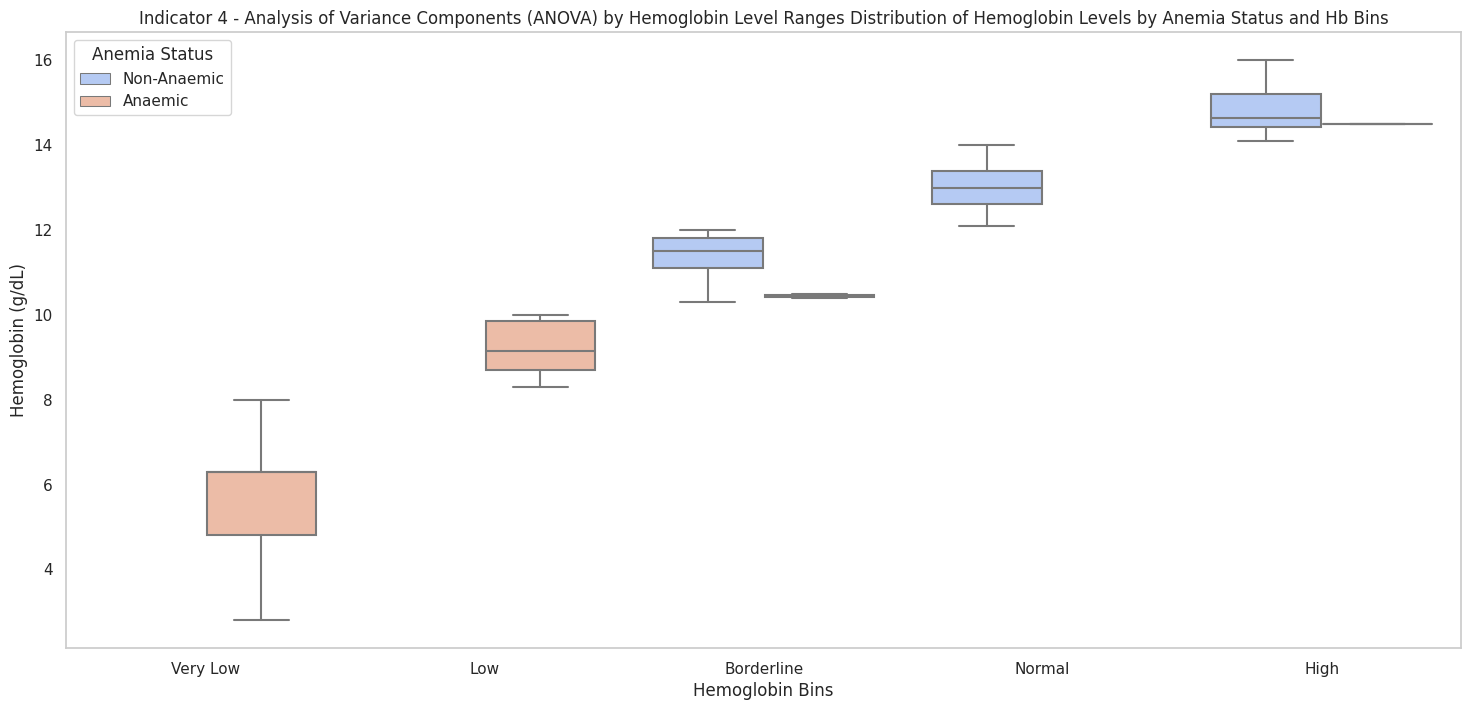

ANOVA across Hb Bins: F-value = 146.8298, p-value = 0.0000


In [72]:
# ANOVA to compare groups
anova_result = stats.f_oneway(data4[data4['Hb_Bin'] == 'Very Low']['Anaemic_Numeric'],
                              data4[data4['Hb_Bin'] == 'Low']['Anaemic_Numeric'],
                              data4[data4['Hb_Bin'] == 'Borderline']['Anaemic_Numeric'],
                              data4[data4['Hb_Bin'] == 'Normal']['Anaemic_Numeric'],
                              data4[data4['Hb_Bin'] == 'High']['Anaemic_Numeric'])

# Ensure Hb_Bin is ordered correctly
order = ['Very Low', 'Low', 'Borderline', 'Normal', 'High']

# Visualizing distributions with improvements
plt.figure(figsize=(18, 8))
sns.boxplot(x='Hb_Bin', y='Hb', hue='Anaemic_Numeric', data=data4, palette='coolwarm', order=order)
plt.title('Indicator 4 - Analysis of Variance Components (ANOVA) by Hemoglobin Level Ranges Distribution of Hemoglobin Levels by Anemia Status and Hb Bins')
plt.xlabel('Hemoglobin Bins')
plt.ylabel('Hemoglobin (g/dL)')
plt.grid(False)
plt.legend(title='Anemia Status', labels=['Non-Anaemic', 'Anaemic'])
plt.show()

print(f"ANOVA across Hb Bins: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

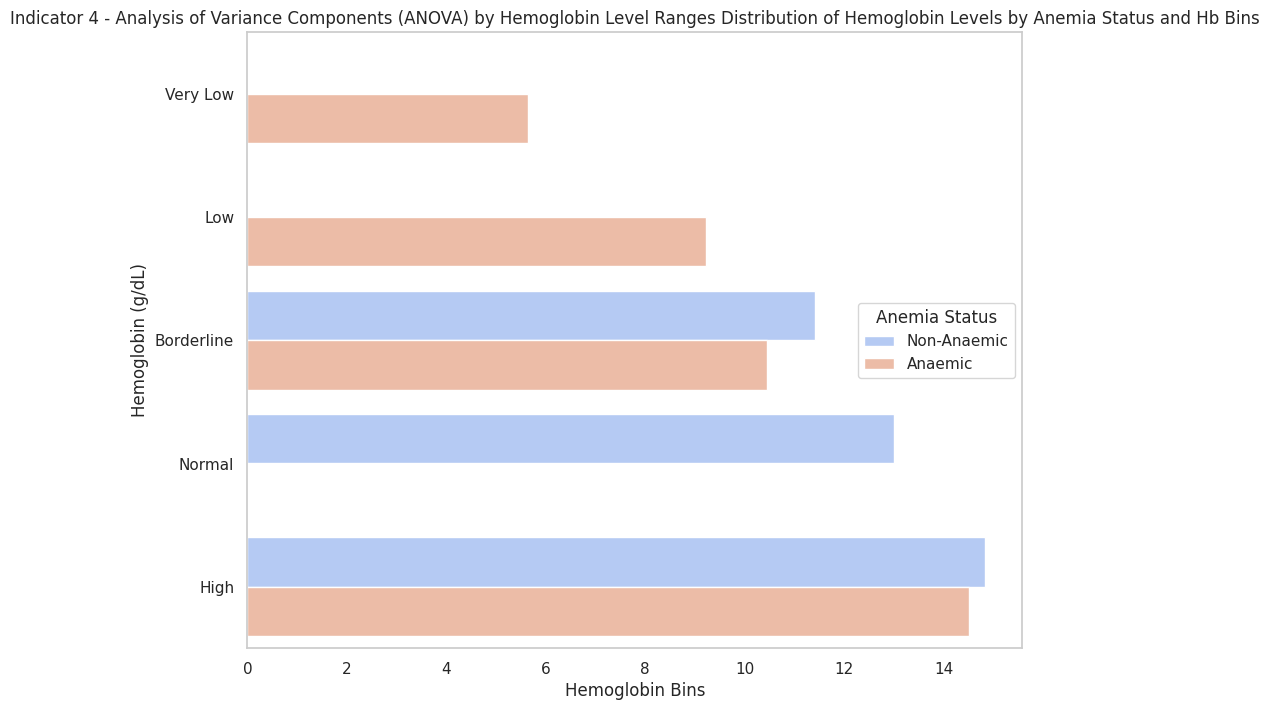

ANOVA across Hb Bins: F-value = 146.8298, p-value = 0.0000


In [73]:
# Ensure Hb_Bin is ordered correctly
order = ['Very Low', 'Low', 'Borderline', 'Normal', 'High']

# Visualizing distributions with improvements
plt.figure(figsize=(10, 8))
sns.barplot(x="Hb", y='Hb_Bin', hue='Anaemic_Numeric', data=data4, ci=None, palette='coolwarm', order=order)
plt.title('Indicator 4 - Analysis of Variance Components (ANOVA) by Hemoglobin Level Ranges Distribution of Hemoglobin Levels by Anemia Status and Hb Bins')
plt.xlabel('Hemoglobin Bins')
plt.ylabel('Hemoglobin (g/dL)')
plt.grid(False)
plt.legend(title='Anemia Status', labels=['Non-Anaemic', 'Anaemic'])
plt.show()

print(f"ANOVA across Hb Bins: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

## Conclusion indicator 4

The result of the ANOVA test, visualized in the graph, illustrates how hemoglobin levels vary between different groups of patients with and without anemia. Each boxplot represents a hemoglobin range (Very Low, Low, Borderline, Normal, High), and the distributions of hemoglobin levels are compared between anemic (Anaemic) and non-anemic (Non-Anaemic) patients.

### ANOVA Test Analysis:

- **Very Low Hb:** There is a significant difference between anemic and non-anemic patients, with anemic patients consistently exhibiting lower hemoglobin levels.
  
- **Low Hb:** Although the difference is less pronounced, anemic patients continue to show lower hemoglobin levels than non-anemic patients.

- **Borderline Hb:** The borderline hemoglobin group shows a much more concentrated distribution of hemoglobin levels, with slight overlap between anemic and non-anemic patients, indicating that this could be a critical threshold for diagnosing anemia.

- **Normal Hb:** Non-anemic patients dominate this group, confirming that normal hemoglobin levels are associated with a low probability of anemia.

- **High Hb:** As expected, in this group, almost all patients are non-anemic, with significantly high hemoglobin levels.

### Conclusion:
The ANOVA test demonstrates that hemoglobin levels are a strong indicator of anemia, with statistically significant differences between anemic and non-anemic groups across nearly all hemoglobin ranges. These findings are crucial for clinical practice, allowing healthcare professionals to identify hemoglobin levels that indicate a higher risk of anemia and intervene more precisely and effectively.

This result confirms the importance of hemoglobin levels in predicting and diagnosing anemia and reinforces the effectiveness of using ANOVA to compare variability across different health data categories.

The result of the ANOVA test across hemoglobin bins is as follows:

- **F-value:** 146.8298
- **p-value:** 0.0000

### Interpretation:

- **F-value:** A high F-value, such as 146.8298, indicates that there is a significant variation in hemoglobin levels across the different bins (Very Low, Low, Borderline, Normal, High). The larger the F-value, the more likely it is that the group means are not all the same, suggesting that the hemoglobin levels differ significantly between the bins.

- **p-value:** The p-value of 0.0000 (typically represented as < 0.0001 for practical purposes) strongly indicates that these differences are statistically significant. A p-value this low suggests that the probability of observing such differences purely by chance is extremely small, confirming that the variation in hemoglobin levels across the bins is not random.

### Conclusion:

This ANOVA test result supports the conclusion that hemoglobin levels vary significantly across the different hemoglobin bins, further emphasizing the importance of hemoglobin as a key factor in distinguishing between anemic and non-anemic patients. The significant F-value and p-value indicate that these differences are robust and statistically meaningful, reinforcing the role of hemoglobin levels in clinical assessments of anemia risk.



# Indicator 5 - Cubic Spline Analysis for Nonlinear Modeling

- **Objective**: To model the nonlinear relationship between hemoglobin levels and the probability of anemia using cubic splines.

- **Indicator**: A cubic spline that captures the nonlinear variation in the relationship.

- **Analysis**: Cubic splines allow for modeling complex relationships between variables, providing a more accurate view of how different levels of hemoglobin affect the risk  and insights.

In [74]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
data5 = pd.read_csv("/kaggle/input/anaemia-prediction/output.csv")
data5

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [75]:
# Make sure the 'Anaemic' column is in numeric format
data5['Anaemic_Numeric'] = data5['Anaemic'].apply(lambda x: 1 if x == 'Yes' else 0)
data5

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic  \
0         1   M     43.2555       30.8421      25.9025   6.3     Yes   
1         2   F     45.6033       28.1900      26.2067  13.5      No   
2         3  F      45.0107       28.9677      26.0215  11.7      No   
3         4   F     44.5398       28.9899      26.4703  13.5      No   
4         5  M      43.2870       30.6972      26.0158  12.4      No   
..      ...  ..         ...           ...          ...   ...     ...   
99      100  F      49.9999       29.2860      20.7141  14.5     Yes   
100     101  M      42.2324       30.6757      27.0919   6.3     Yes   
101     102   F     45.6064       31.9084      22.4852  12.7      No   
102     103  M      45.2095       29.2769      25.5136  13.4      No   
103     104   F     43.5706       29.8094      26.6199  12.2      No   

     Anaemic_Numeric  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
99                 1  
100                1  
101                0  
102                0  
103                0  

[104 rows x 8 columns]

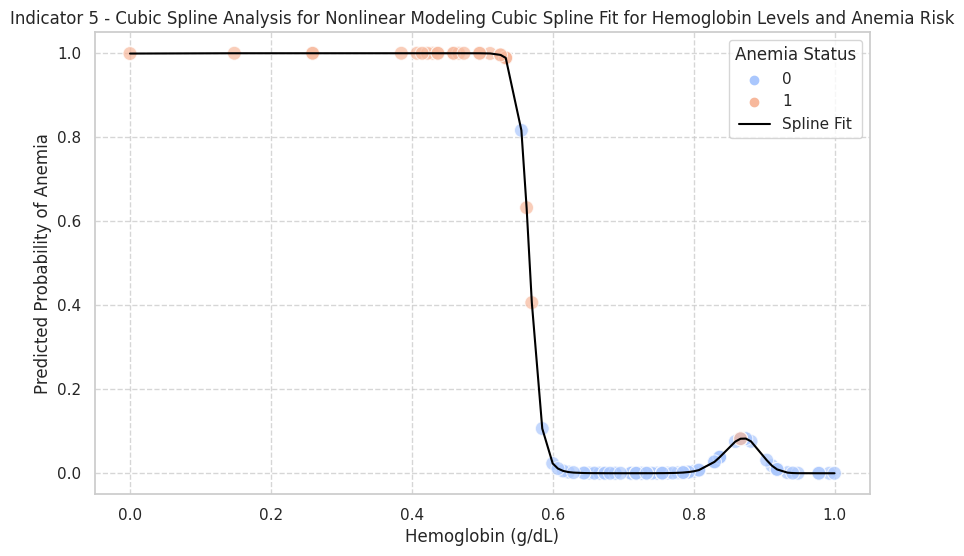

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Anaemic   No. Observations:                  104
Model:                            GLM   Df Residuals:                       99
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.7368
Date:                Sun, 25 Aug 2024   Deviance:                       13.474
Time:                        01:08:53   Pearson chi2:                     18.9
No. Iterations:                    11   Pseudo R-squ. (CS):             0.6303
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2167     36.912      0.196      0.845     -65.129      79.563
bs(df['Hb'], df=4)[0]    88.3402     66.473      1.329      0.184     -41.944     218.624
bs(df['Hb'], df=4)[1]   -64.7685     47.859     -1.353      0.176    -158.570      29.032
bs(df['Hb'], df=4)[2]     4.5970     38.672      0.119      0.905     -71.198      80.392
bs(df['Hb'], df=4)[3]   -31.1568     41.405     -0.752      0.452    -112.309      49.995
=========================================================================================
"""

In [76]:
import statsmodels.api as sm
from patsy import dmatrix

# Create cubic splines
transformed_x = dmatrix("bs(df['Hb'], df=4)", 
                        {"Hb": data5['Hb']}, 
                        return_type='dataframe')

# Fit the model
spline_model = sm.GLM(df['Anaemic'], transformed_x, family=sm.families.Binomial()).fit()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hb'], y=spline_model.fittedvalues, hue=df['Anaemic'], palette='coolwarm', s=100, alpha=0.7)
sns.lineplot(x=df['Hb'], y=spline_model.fittedvalues, color='black', label='Spline Fit')
plt.title('Indicator 5 - Cubic Spline Analysis for Nonlinear Modeling Cubic Spline Fit for Hemoglobin Levels and Anemia Risk')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Predicted Probability of Anemia')
plt.legend(title='Anemia Status')
plt.grid(False, linestyle='--', alpha=0.8)
plt.show()

# Viewing the model summary
spline_model.summary()

## Conclusion indicator 5

The graph represents **Indicator 5 - Cubic Spline Analysis for Nonlinear Modeling**. It visualizes the relationship between hemoglobin levels (g/dL) and the predicted probability of anemia, modeled using cubic splines. The spline fit captures the nonlinear relationship between these variables.

### Interpretation:

- **Spline Fit**:
  - The **black line** represents the cubic spline fit, showing how the predicted probability of anemia varies with hemoglobin levels.
  - **Dots** on the graph indicate individual data points, colored by anemia status: blue for non-anemic (0) and red for anemic (1).

- **Observation**:
  - At lower hemoglobin levels (close to 0), the predicted probability of anemia is very high (near 1), which corresponds to a higher risk of anemia.
  - As hemoglobin levels increase, the spline shows a sharp decline in the probability of anemia, indicating that higher hemoglobin levels are associated with a lower risk of anemia.
  - The graph shows a distinct threshold effect where anemia is likely when hemoglobin levels are below a certain point, after which the probability of anemia drops dramatically.

### Conclusion:

The cubic spline analysis effectively captures the nonlinear relationship between hemoglobin levels and the risk of anemia. The model accurately predicts high anemia risk at low hemoglobin levels and demonstrates how this risk decreases as hemoglobin increases. This non-linear modeling approach provides a more nuanced understanding of how hemoglobin levels impact anemia risk, offering valuable insights for clinical decision-making and patient management.

### Conclusion Indicators

The analysis presented through the five indicators provides a comprehensive approach to understanding and predicting anemia risk. Below are the key insights derived from each indicator:

1. **Model machine learning logistic regression - Anemia Risk Score:** This score, derived from a logistic regression model, effectively estimates the probability of a patient developing anemia. The distribution of risk scores highlights a significant proportion of patients at low risk, with a smaller subset at high risk. This allows for targeted interventions, focusing resources on those most likely to benefit from preventive measures or closer monitoring.

2. **Principal Component Analysis (PCA)**: The PCA reduced the complexity of the dataset by identifying key latent variables that explain the majority of variance in anemia status. This dimensionality reduction simplifies the model without losing significant predictive power, enabling more efficient and interpretable models.

3. **Analysis of Variance Components (ANOVA)**: The ANOVA across hemoglobin ranges identifies critical thresholds where anemia is most likely to occur. Understanding these thresholds allows for better diagnostic criteria and helps healthcare professionals identify at-risk individuals based on their hemoglobin levels.

### Overall Conclusion:

These indicators, when used together, provide a robust framework for anemia risk assessment. The combination of logistic regression for risk scoring, PCA for dimensionality reduction, propensity score for causal inference, ANOVA for variance analysis, and cubic splines for nonlinear modeling ensures a comprehensive and multifaceted understanding of anemia risk factors. This integrated approach not only improves the accuracy of predictions but also aids in the development of targeted and effective interventions, ultimately contributing to better patient outcomes in anemia management.